<a href="https://colab.research.google.com/github/Akramkhan01/Email-Campaign-Effectiveness-Prediction-Capstone-Project/blob/main/Email_Campaign_Effectiveness_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Email Campaign Effectiveness Prediction**

# **Problem Statement**

Most of the small to medium business owners are making effective use of Gmail-based Email marketing Strategies for offline targeting of converting their prospective customers into leads so that they stay with them in Business. The main objective is to create a machine learning model to characterize the mail and track the mail that is ignored; read; acknowledged by the reader.

In [ ]:
#importing library
import pandas as pd 
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import scipy.stats as stat
import pylab
import missingno as mno
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Modelling
#Train-Test Split
from sklearn.model_selection import train_test_split
#Grid Search for Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

#Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, roc_auc_score, f1_score, recall_score,roc_curve, classification_report

#importing random under sampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
#importing SMOTE
from imblearn.over_sampling import SMOTE

#importing ML libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


%matplotlib inline 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Path of data in drive
data_path='/content/drive/MyDrive/Email Campaign Effectiveness Prediction - Akram Khan/data_email_campaign.csv'
#Reading csv file
email_data=pd.read_csv(data_path)

In [ ]:
#Print top  rows 
email_data.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


In [ ]:
#Print bottom  rows 
email_data.tail()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
68348,EMA00089995974500,2,0.4,1,F,2,22.0,3,737,16.0,13.0,0
68349,EMA00089998225300,1,1.3,1,C,2,40.0,2,653,31.0,16.0,0
68350,EMA00089998436500,1,2.2,2,NaN,2,33.0,2,490,9.0,0.0,0
68351,EMA00089999168800,1,0.4,1,E,2,50.0,1,733,14.0,4.0,0
68352,EMA00089999316900,1,1.5,1,G,2,20.0,2,1038,6.0,0.0,0


# **Data Description**

The data has the following features:
* Email_ID — This column contains the email ids of individuals.
* Email_type — Email type contains 2 categories 1 and 2. We can assume that the types are like promotional email or important email.
* Subject_Hotness_Score — It is the email effectiveness score.
* Email_Source — It represents the source of the email like sales or marketing or product type email.
* Email_Campaign_Type — Campaign type
* Total_Past_Communications — This column contains the previous mails from the same source.
* Customer_Location — Categorical data which explains the different demographics of the customers.
* Time_Email_sent_Category — It has 3 categories 1,2 and 3 which may give us morning,evening and night time slots.
* Word_Count — It contains the no.of words contained in the mail.
* Total_Links — Total links from the mail.
* Total_Images — The banner images from the promotional email.
* Email_Status — It is the target variable which contains the characterization of the mail that is ignored; read; acknowledged by the reader.




# **Exploratory Data Analysis**

In [ ]:
#Retreiving Column names
email_data.columns

Index(['Email_ID', 'Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Customer_Location', 'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images',
       'Email_Status'],
      dtype='object')

In [ ]:
#Number of rows and columns
email_data.shape

(68353, 12)

In [ ]:
# Check for duplicates

duplicate_df = email_data[email_data.duplicated()]
duplicate_df

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status


# **We dont have any duplicate records**

In [ ]:
#Description of dataset 
email_data.describe()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
count,68353.000000,68353.000000,68353.000000,68353.000000,61528.000000,68353.000000,68353.000000,66152.000000,66676.000000,68353.000000
mean,1.285094,1.095481,1.456513,2.272234,28.933250,1.999298,699.931751,10.429526,3.550678,0.230934
std,0.451462,0.997578,0.498109,0.468680,12.536518,0.631103,271.719440,6.383270,5.596983,0.497032
min,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,40.000000,1.000000,0.000000,0.000000
25%,1.000000,0.200000,1.000000,2.000000,20.000000,2.000000,521.000000,6.000000,0.000000,0.000000
50%,1.000000,0.800000,1.000000,2.000000,28.000000,2.000000,694.000000,9.000000,0.000000,0.000000
75%,2.000000,1.800000,2.000000,3.000000,38.000000,2.000000,880.000000,14.000000,5.000000,0.000000
max,2.000000,5.000000,2.000000,3.000000,67.000000,3.000000,1316.000000,49.000000,45.000000,2.000000


In [ ]:
#Type of features
email_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


# **Handling Missing Data**

In [ ]:
#missing values in our dataset
missing = pd.DataFrame([email_data.isnull().sum(),email_data.isnull().sum()*100.0/email_data.shape[0]]).T
missing.columns = ['No. of Missing Data', '% Missing Data']
missing


,No. of Missing Data,% Missing Data
Email_ID,0.0,0.000000
Email_Type,0.0,0.000000
Subject_Hotness_Score,0.0,0.000000
Email_Source_Type,0.0,0.000000
Customer_Location,11595.0,16.963411
Email_Campaign_Type,0.0,0.000000
Total_Past_Communications,6825.0,9.984931
Time_Email_sent_Category,0.0,0.000000
Word_Count,0.0,0.000000
Total_Links,2201.0,3.220049


From the above data we realise that 4 features have null values. Will be handling it in the upcoming Data Cleaning section.

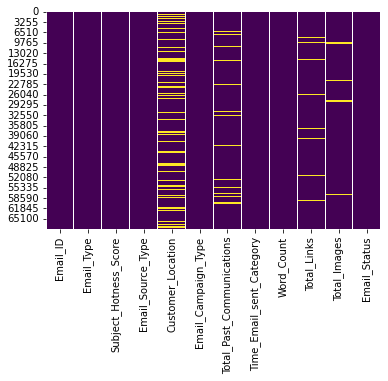

In [ ]:
# Visualizing the missing values
sns.heatmap(email_data.isnull(),cbar=False,cmap='viridis')

In [ ]:
email_data.describe()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
count,68353.000000,68353.000000,68353.000000,68353.000000,61528.000000,68353.000000,68353.000000,66152.000000,66676.000000,68353.000000
mean,1.285094,1.095481,1.456513,2.272234,28.933250,1.999298,699.931751,10.429526,3.550678,0.230934
std,0.451462,0.997578,0.498109,0.468680,12.536518,0.631103,271.719440,6.383270,5.596983,0.497032
min,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,40.000000,1.000000,0.000000,0.000000
25%,1.000000,0.200000,1.000000,2.000000,20.000000,2.000000,521.000000,6.000000,0.000000,0.000000
50%,1.000000,0.800000,1.000000,2.000000,28.000000,2.000000,694.000000,9.000000,0.000000,0.000000
75%,2.000000,1.800000,2.000000,3.000000,38.000000,2.000000,880.000000,14.000000,5.000000,0.000000
max,2.000000,5.000000,2.000000,3.000000,67.000000,3.000000,1316.000000,49.000000,45.000000,2.000000


# **Analysis of Categorical data**

In [ ]:
#creating new dataframe of only categorical columns
ds_cat = email_data.select_dtypes(include =['object','int']).copy()
#dropping Word_Count because it's numeric data
ds_cat.drop('Word_Count',axis=1,inplace=True)
ds_cat.head(2)

,Email_ID,Email_Type,Email_Source_Type,Customer_Location,Email_Campaign_Type,Time_Email_sent_Category,Email_Status
0,EMA00081000034500,1,2,E,2,1,0
1,EMA00081000045360,2,1,NaN,2,2,0


In [ ]:
ds_cat_stats = pd.DataFrame(columns = ['Column', 'Values', 'Total Count', 'Total_COunt_Excluding_Null', 
                                       'Missing Value', 'Missing %'])
tmp = pd.DataFrame()

for c in ds_cat.columns:
    tmp['Column'] = [c]
    tmp['Values'] = [ds_cat[c].unique()]
    tmp['Total Count'] = len(list(ds_cat[c].unique()))
    tmp['Total_COunt_Excluding_Null'] = int(ds_cat[c].nunique())
    tmp['Missing Value'] = ds_cat[c].isnull().sum()
    tmp['Missing %'] = (ds_cat[c].isnull().sum()/ len(ds_cat)).round(3)*100
    ds_cat_stats = ds_cat_stats.append(tmp)
    
ds_cat_stats

,Column,Values,Total Count,Total_COunt_Excluding_Null,Missing Value,Missing %
0,Email_ID,"[EMA00081000034500, EMA00081000045360, EMA0008...",68353,68353,0,0.0
0,Email_Type,"[1, 2]",2,2,0,0.0
0,Email_Source_Type,"[2, 1]",2,2,0,0.0
0,Customer_Location,"[E, nan, B, C, G, D, F, A]",8,7,11595,17.0
0,Email_Campaign_Type,"[2, 3, 1]",3,3,0,0.0
0,Time_Email_sent_Category,"[1, 2, 3]",3,3,0,0.0
0,Email_Status,"[0, 1, 2]",3,3,0,0.0


* As we can see we have 17% missing values in Customer Location.
* There is no missing values in any other categorical variable.
* Email_Type and Email_Source_Type have 2 categories.
* Email_Campaign_Type,Time_Email_sent_Category and Email_Status have 3 Categories
* Look at the Variable 'Customer_Location' -- distinct categories are 8 but without nans it is 7.

**Since we are working on a Multi-Class Classification problem we should also look at the relationship between the dependent variable and independent variable.**

In [ ]:
# Dropping Email_ID column
ds_cat.drop('Email_ID',axis=1,inplace=True)

In [ ]:
def barPerc(df,xVar,ax):
    ''' barPerc(): Add percentage for hues to bar plots
    args:
        df: pandas dataframe
        xVar: (string) X variable 
        ax: Axes object (for Seaborn Countplot)
    '''
    # 1. how many X categories
    ##   check for NaN and remove
    numX=len([x for x in df[xVar].unique() if x==x])
    # 2. The bars are created in hue order, organize them
    bars = ax.patches
    ## 2a. For each X variable
    for ind in range(numX):
        ## 2b. Get every hue bar
        ##     ex. 7 X categories, 3 hues =>
        ##    [0, 8, 16] are hue bars for 1st X category
        hueBars=bars[ind:][::numX]
        ## 2c. Get the total height (for percentages)
        total = sum([x.get_height() for x in hueBars])
        # 3. Print the percentage on the bars
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")

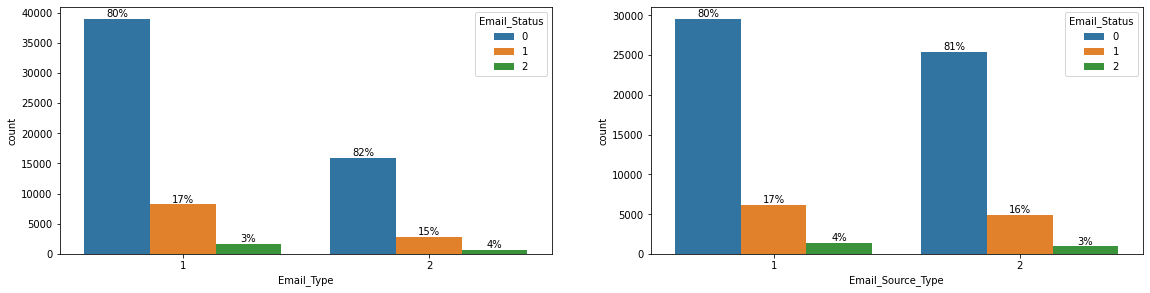

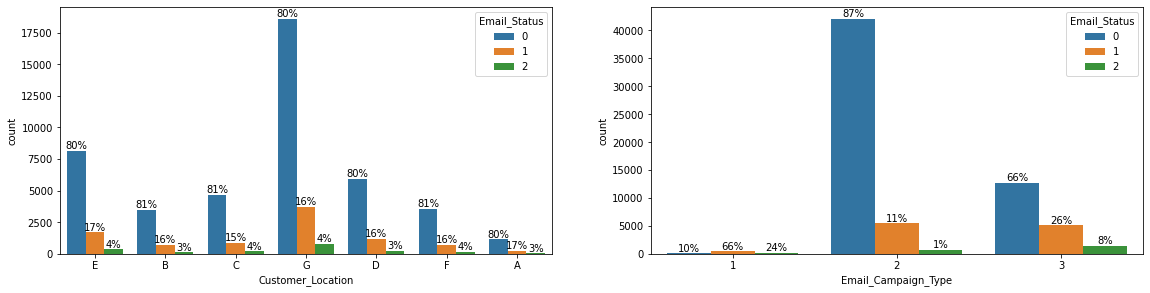

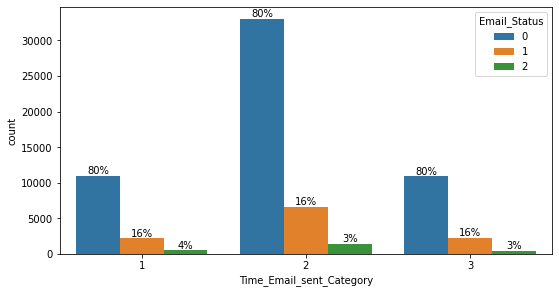

<Figure size 2160x720 with 0 Axes>

In [ ]:
ix = 1
fig = plt.figure(figsize = (30,10))
for c in list(ds_cat.columns):
    if ix < 3:
        if c != 'Email_Status':
            ax1 = fig.add_subplot(2,3,ix)
            sns.countplot(data = ds_cat, x=c,hue='Email_Status' ,ax = ax1)
            barPerc(ds_cat,c,ax1)            
    ix = ix +1
    if ix == 3: 
        fig = plt.figure(figsize = (30,10))
        ix =1

As we can observe the distribution of Email_Status is almost similar in all the categories except in Email_Campaign_Type we can see that it shows a totally different trend . For Email_Campaign_Type=1 we see that only 10% of customers are ignoring the email and for 2 around 87% customer ignore the emails.

# **Analysis of Numerical Data**

In [ ]:
#creating new dataframe of only numerical columns
ds_num = email_data.select_dtypes(include =['float']).copy()
ds_num['Word_Count'] = email_data.loc[ds_num.index, 'Word_Count'].copy()
ds_num.head(2)

,Subject_Hotness_Score,Total_Past_Communications,Total_Links,Total_Images,Word_Count
0,2.2,33.0,8.0,0.0,440
1,2.1,15.0,5.0,0.0,504


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

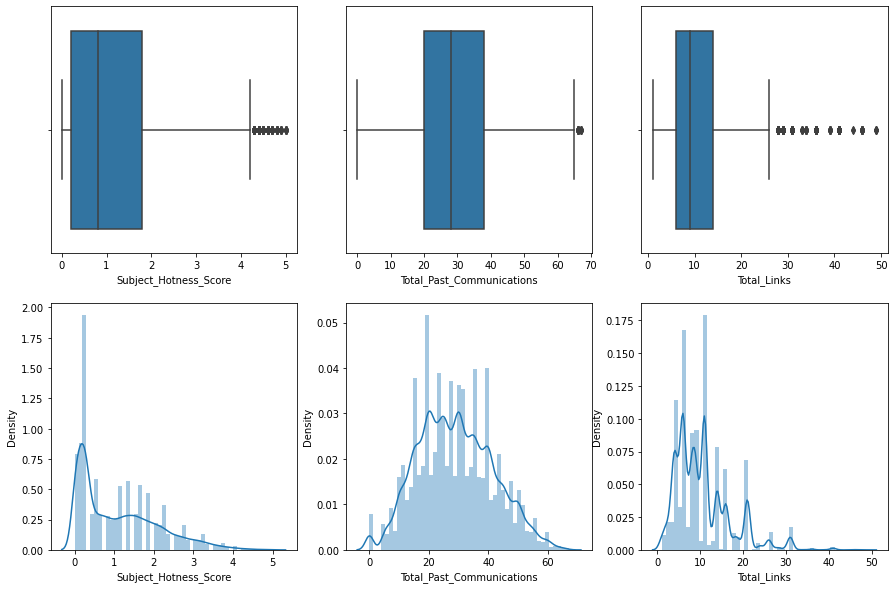

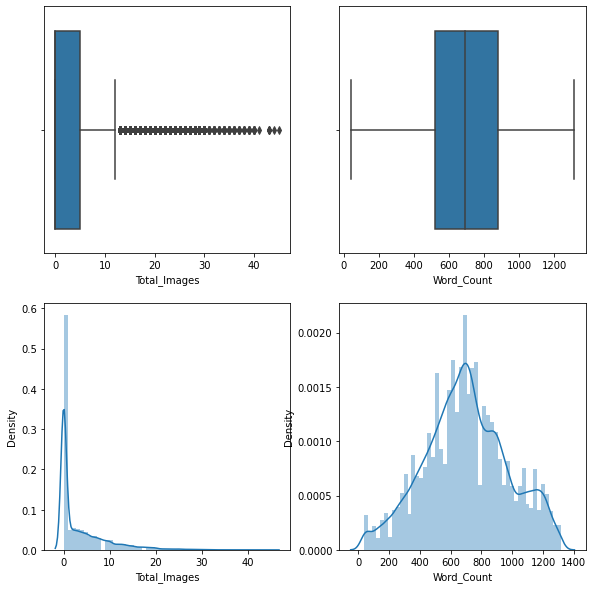

In [ ]:
ix = 1
fig = plt.figure(figsize = (15,10))
for c in list(ds_num.columns):
    if ix <= 3:
            ax1 = fig.add_subplot(2,3,ix)
            sns.boxplot(data = ds_num, x=c, ax = ax1)
            ax2 = fig.add_subplot(2,3,ix+3)
            sns.distplot(ds_num[c], ax=ax2)
            
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1

There are **outliers** in **Subject_Hotness_Score**,**Total_Links** and **Total_Images** and the distribution of these features are **right skewed** in nature. There are also a few outliers in Total_Past_Communication which has a normal distribution .

### **Lets look at the relationship between the dependent variable and independent variable. In order to do that let's add our dependent variable to this dataset.**

In [ ]:
ds_num['Email_Status'] = email_data.loc[ds_num.index, 'Email_Status'].copy()

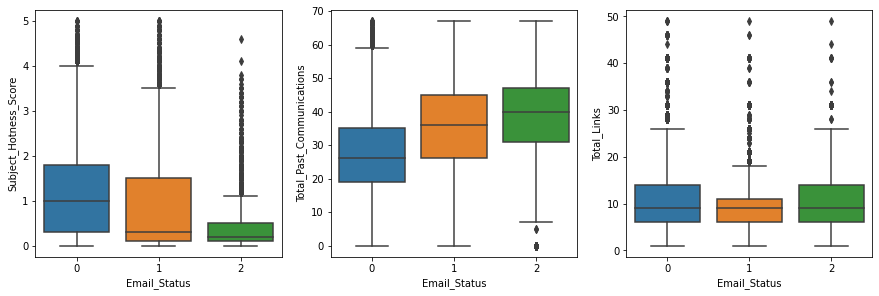

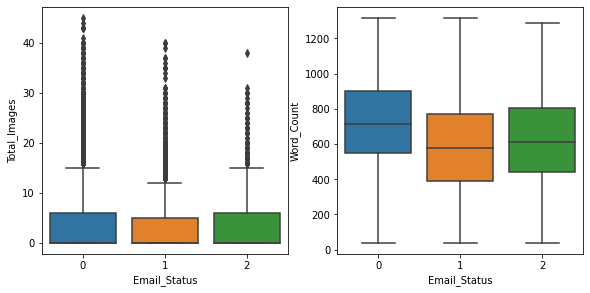

<Figure size 1080x720 with 0 Axes>

In [ ]:
ix = 1
fig = plt.figure(figsize = (15,10))
for c in list(ds_num.columns):
    if ix <= 3:
        if c != 'Email_Status':
            ax1 = fig.add_subplot(2,3,ix)
            sns.boxplot(data=ds_num, x='Email_Status', y=c, ax=ax1)        
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1

* Subject_Hotness_Score -> All Email_Status i.e 0,1,2 have outliers. 0 have highest median and 1,2 are right skewed. It is observed that the Subject_Hotness_Score for read/acknowledged mails are much lower.
* Total_Past_Communications -> 0,2 have outliers and 2 have highest median .
* Total_Links ->0,1,2 all have outliers,All have the same median but 0,2 have higher variance compare to 1.
* Total_Images ->0,1,2 all have outliers and All have the same median. Hence all the mails have the same range of images.
* Word_Count ->Median of 0 is highest. Thus we can understand that ignored mails have higher word count.


## **Lets see the correlation of numerical**

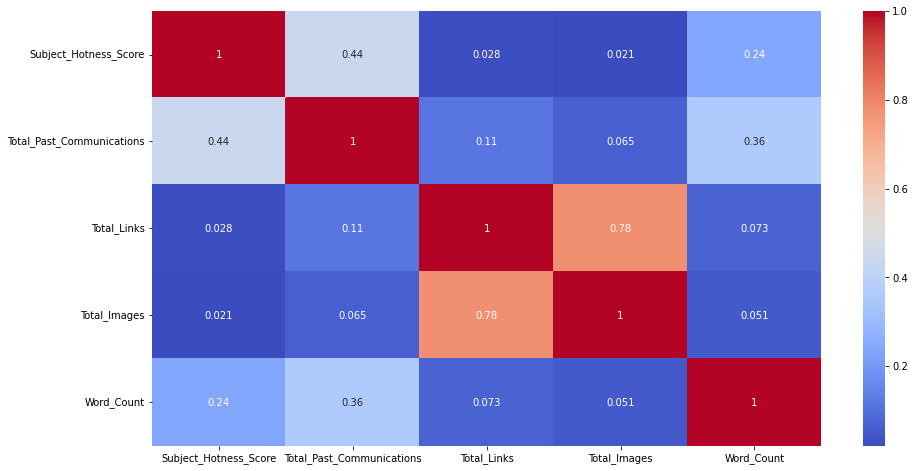

In [ ]:
## Correlation
plt.figure(figsize=(15,8))
correlation = ds_num.drop('Email_Status',axis=1).corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

We can observe that there is a relationship between Total_Images and Total_Links, they have 78% positive correlation. To understand if this relation holds true, we try and validate with a lmplot b/w the two features.

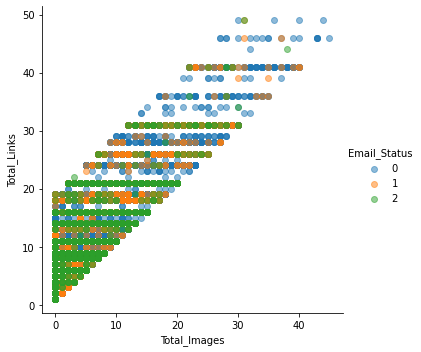

In [ ]:
sns.lmplot(x='Total_Images', y='Total_Links', hue='Email_Status', data=email_data, fit_reg=False, scatter_kws={'alpha':0.5})

We can conclude from the above information that there is a high positive correlation between these two features. Lets now understand each feature individually.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


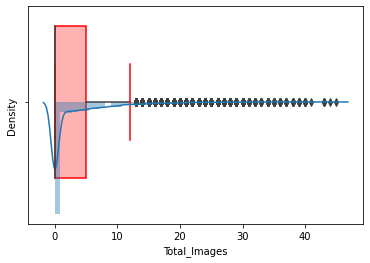

In [ ]:
ax=sns.boxplot(ds_num['Total_Images'],capprops=dict(color="red"),boxprops=dict(facecolor="red", color="red"))
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))
sns.distplot(ds_num['Total_Images'])

More than 50% of values are 0 and there are there is a presence of outliers in Total_Images

In [ ]:
#Finding number of data having 0 images
img_cnt_0=ds_num[ds_num['Total_Images']==0].count()['Total_Images']
#Total number of non nan data
total=ds_num['Total_Images'].count()
#finding percentage
pcnt_img_0=(img_cnt_0/total)*100
print("Percentage of data having Total_Images Zero is = ",pcnt_img_0)

Percentage of data having Total_Images Zero is =  52.58263843061971


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


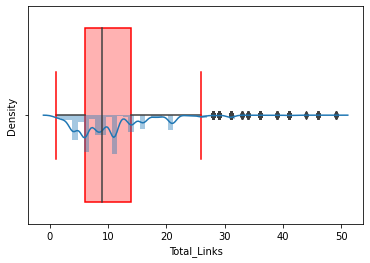

In [ ]:
ax=sns.boxplot(ds_num['Total_Links'],capprops=dict(color="red"),boxprops=dict(facecolor="red", color="red"))
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))
sns.distplot(ds_num['Total_Links'])

Compared to Total_Images, Total_Links has very few outliers. 
 
 Since images and links are correlated and most of the values in Total_Images is 0 we will combine both the features.
 
 Before that we need to see if there is any null values in this column .

In [ ]:
# Number of NaNs for each object
email_data.isnull().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

Since there are null values we need to impute them individually after that we can combine Total_Links and Total_Images

# **Null Value Imputation**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


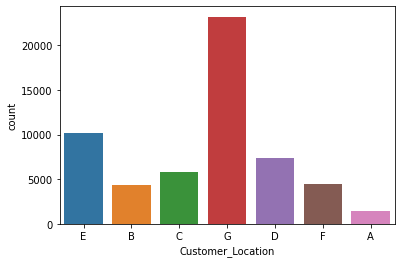

In [ ]:
#Visualizing Customer_Location
sns.countplot(email_data['Customer_Location'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Customer Locations bar plot after imputing nulls')

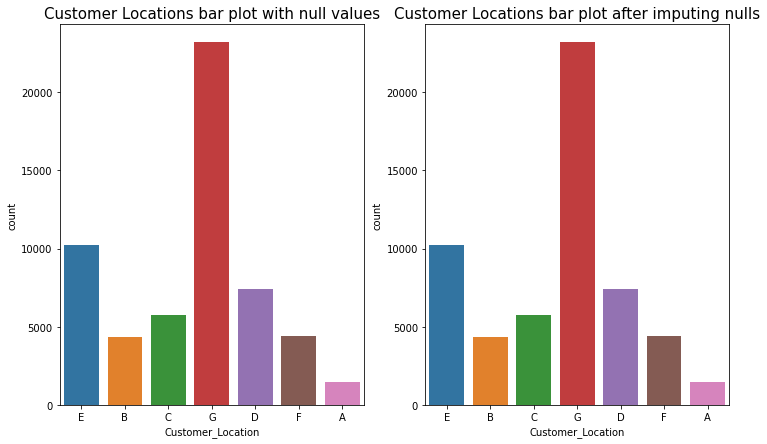

In [ ]:
plt.figure(figsize=(12,7))

# Plotting Customer Locations with null values
plt.subplot(1,2,1)
sns.countplot(email_data['Customer_Location'])
plt.title('Customer Locations bar plot with null values', fontsize=15)

# Plotting bar plot for Customer_Location
plt.subplot(1,2,2)
sns.countplot(email_data['Customer_Location'])
plt.title('Customer Locations bar plot after imputing nulls', fontsize=15)

Area G has most number of customers and area A has least number of customers. Also the bars from before and after missing value imputation are in conjunction which implies the method of predicting missing values has worked quite well.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Email Source Types bar plot')

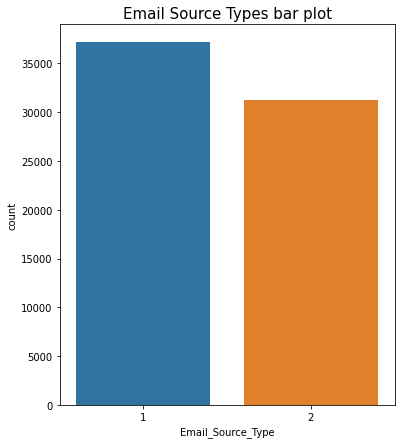

In [ ]:
# Plotting bar plot for Email_Source_Type
plt.figure(figsize=(6,7))
sns.countplot(email_data['Email_Source_Type'])
plt.title('Email Source Types bar plot', fontsize=15)

Emails were sent from both the sources with almost equal probability.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


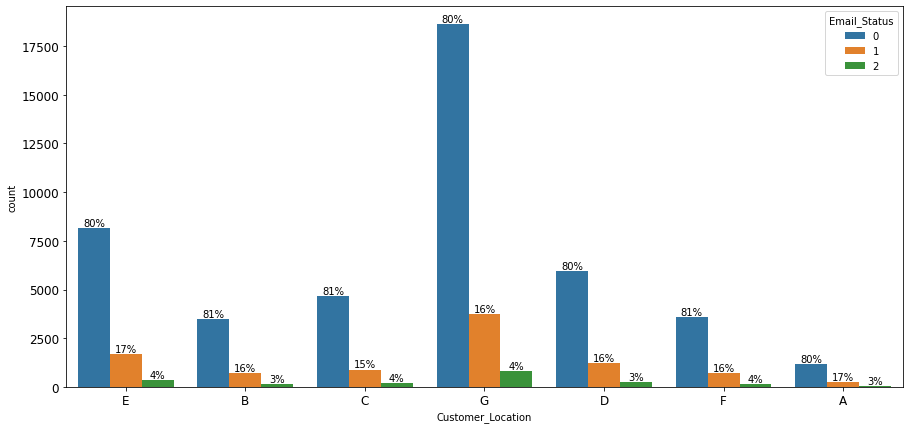

In [ ]:
plt.figure(figsize=(15,7))
ax=sns.countplot(email_data['Customer_Location'],hue=email_data['Email_Status'])
plt.xticks(size=12)
plt.yticks(size=12)
barPerc(email_data,'Customer_Location',ax)

As we can see irrespective of location the ratio of Email_Status is same throughout .So we can drop the location column

In [ ]:
'''
print('Shape of data before dropping ',email_data.shape)
#dropping Customer_Location column
email_data.drop('Customer_Location',inplace=True,axis=1)
print('Shape of data after dropping ',email_data.shape)
'''

"\nprint('Shape of data before dropping ',email_data.shape)\n#dropping Customer_Location column\nemail_data.drop('Customer_Location',inplace=True,axis=1)\nprint('Shape of data after dropping ',email_data.shape)\n"

Lets find out which metrics we should use to fill missing values of Total_Past_Communications column

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


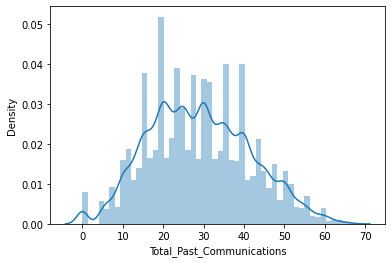

In [ ]:
sns.distplot(email_data.Total_Past_Communications)

As we can observe the data is symmetricaly distributed so we can use mean value for imputing missing values

In [ ]:
print('Number of missing values before imputing is = ',email_data['Total_Past_Communications'].isnull().sum())
email_data['Total_Past_Communications'].fillna(email_data['Total_Past_Communications'].mean(),inplace=True)
print('Number of missing values after imputing is = ',email_data['Total_Past_Communications'].isnull().sum())

Number of missing values before imputing is =  6825
Number of missing values after imputing is =  0


Now lets find out which metrics we should use to fill missing values of Total_Links column

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


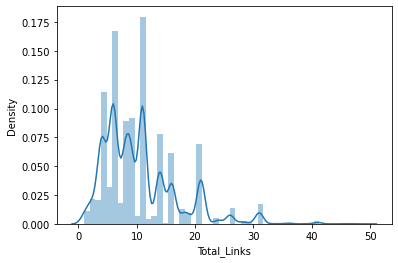

In [ ]:
sns.distplot(email_data.Total_Links)

Since the data is not normally distributed we will use Mode to impute missing value

In [ ]:
#Filling missing values of Total_Links column
print('Number of missing values before imputing is = ',email_data['Total_Links'].isnull().sum())
email_data['Total_Links'].fillna(email_data['Total_Links'].mode()[0],inplace=True)
print('Number of missing values after imputing is = ',email_data['Total_Links'].isnull().sum())

Number of missing values before imputing is =  2201
Number of missing values after imputing is =  0


Now lets find out which metrics we should use to fill missing values of Total_Images column

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


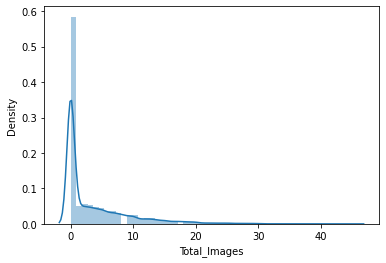

In [ ]:
sns.distplot(email_data.Total_Images)

Since the data is not normally distributed we will use Mode to impute missing value

In [ ]:
#Filling missing values of Total_Links column
print('Number of missing values before imputing is = ',email_data['Total_Images'].isnull().sum())
email_data['Total_Images'].fillna(email_data['Total_Images'].mode()[0],inplace=True)
print('Number of missing values after imputing is = ',email_data['Total_Images'].isnull().sum())

Number of missing values before imputing is =  1677
Number of missing values after imputing is =  0


In [ ]:
email_data.isnull().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications        0
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                      0
Total_Images                     0
Email_Status                     0
dtype: int64

**Now we have no missing values, So we can combine Links and Images column into one.**

In [ ]:
email_data['Links_Images']=email_data['Total_Links']+email_data['Total_Images']

In [ ]:
#Dropping Total_Images and Total_Links  column
print('Shape of data before dropping ',email_data.shape)
email_data.drop(['Total_Images','Total_Links'],inplace=True,axis=1)
print('Shape of data after dropping ',email_data.shape)

Shape of data before dropping  (68353, 13)
Shape of data after dropping  (68353, 11)


Text(0.5, 1.0, 'Pie Chart showing Email Status')

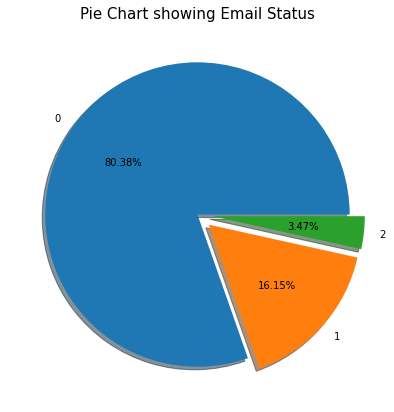

In [ ]:
# Plotting a pie chart for Email_Status
plt.figure(figsize = (10,7))
plt.pie(email_data['Email_Status'].value_counts(), labels = [0,1,2], explode = [0,0.1,0.1], autopct='%1.2f%%', shadow = True)
plt.title('Pie Chart showing Email Status', fontsize = 15)

Around 3.47% of the emails are actually hitting targets that is those customers are reading and acknowledging the mails. Around 16.15% of customers are reading the mails who might be potential customers given some offers or something else.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Email Types bar plot')

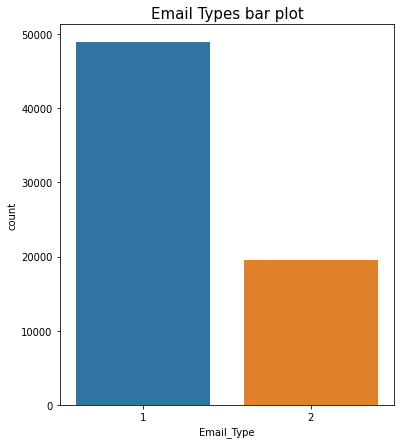

In [ ]:
# Plotting bar plot for Email_Type
plt.figure(figsize=(6,7))
sns.countplot(email_data['Email_Type'])
plt.title('Email Types bar plot', fontsize=15)

# **Feature Engineering**

Lets understand the **multicollinearity** within the numerical featrures.

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(email_data[[i for i in email_data.describe().columns if i not in ['Email_ID','Customer_Location','Email_Type','Email_Source_Type','Email_Campaign_Type','Time_Email_sent_Category','Total_Links','Total_Images','Email_Status']]])


,variables,VIF
0,Subject_Hotness_Score,1.734531
1,Total_Past_Communications,3.430879
2,Word_Count,3.687067
3,Links_Images,2.629047


Here, the VIF is within acceptable limits i.e. VIF<5 . Hence multicollinearity is not a major issue for our data.



# **Outlier Treatment**

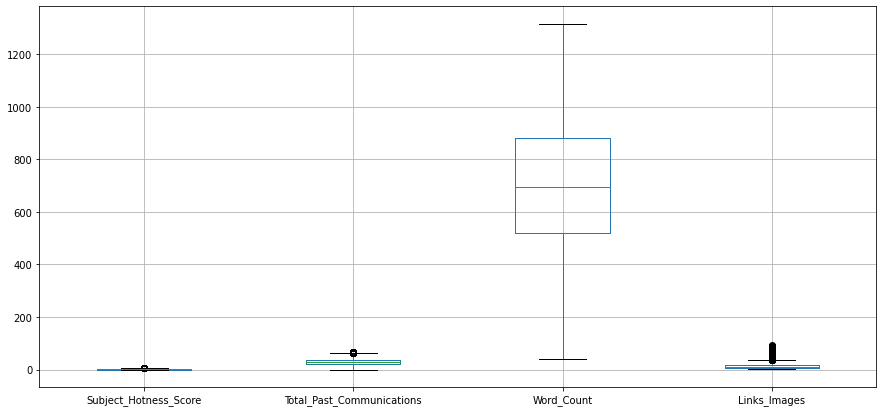

In [ ]:
#Lets find out which all numerical column have outliers using boxplot
plt.figure(figsize=(15,7))
numerical_col=['Subject_Hotness_Score','Total_Past_Communications','Word_Count','Links_Images']
email_data.boxplot(numerical_col)

Except Word_Count column all other numeric column have outliers. Since our dependent variable is highly imbalanced so before dropping outliers we should check that it will not going to delete more than 5% of minority class which is Email_Status =1,2

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


{'Subject_Hotness_Score': {0: 170, 1: 76, 2: 1}, 'Total_Past_Communications': {1: 56, 0: 67, 2: 13}, 'Links_Images': {0: 3061, 1: 437, 2: 122}}


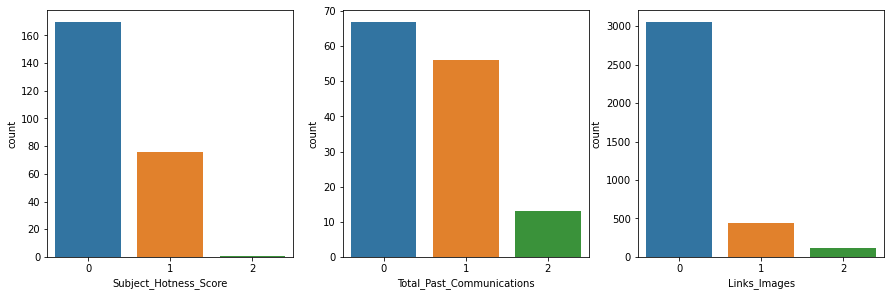

In [ ]:
#removing Word_Count because it does'nt have outlier
numerical_col.remove('Word_Count')

fig = plt.figure(figsize = (15,10))
ix = 1
#dictionary d to store the count of each email_status 
d={}
#iterating through each column which have outlier
for x in [y for y in numerical_col]:
    #Finding Quartile
    q75,q25 = np.percentile(email_data.loc[:,x],[75,25])
    #Calculating Inter Quartile Range
    intr_qr = q75-q25
    #Fixing Boundaries for outliers
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    
    #list y to store email_status of only outliers
    y=[]
    y=email_data.loc[email_data[x] < min]['Email_Status'].tolist()
    y.append(email_data.loc[email_data[x] > max]['Email_Status'].tolist()) 
    d[x]={}
    for i in y[0]:
      d[x][i] = d[x].get(i,0) + 1
    ax1 = fig.add_subplot(2,3,ix)
    sns.countplot(y[0],ax=ax1)
    plt.xlabel(x)      
    ix = ix +1
print(d)

In [ ]:
#finding the percentage of minority classs going to be affected by outliers
sum_min=0
sum_maj=0
for x in [y for y in numerical_col]:
  sum_min+=d[x][1]
  sum_min+=d[x][2]
  sum_maj+=d[x][0]
total=email_data.groupby('Email_Status').count()['Email_Type'][1]+email_data.groupby('Email_Status').count()['Email_Type'][2]
total_0=email_data.groupby('Email_Status').count()['Email_Type'][0]
print("Percentage of majority class having outliers = ",100*sum_maj/total_0)
print("Percentage of minority class having outliers = ",100*sum_min/total)

Percentage of majority class having outliers =  6.002803006861907
Percentage of minority class having outliers =  5.256486728303012


**Since more than 5% of minority classes will be removed if we delete outliers and we don't want that so we will keep it as it is.**

In [ ]:
#Dropping Email_ID column
print('Shape of data before dropping ',email_data.shape)
email_data.drop('Email_ID',inplace=True,axis=1)
print('Shape of data after dropping ',email_data.shape)

Shape of data before dropping  (68353, 11)
Shape of data after dropping  (68353, 10)


Now we are done with outlier treatment and missing value imputation lets move on to our dependent variable

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


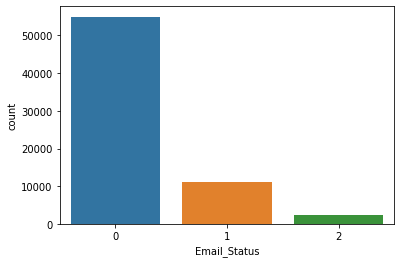

In [ ]:
sns.countplot(email_data['Email_Status'])

In [ ]:
email_data.groupby('Email_Status').count()['Email_Type']

Email_Status
0    54941
1    11039
2     2373
Name: Email_Type, dtype: int64

##**Dependent variable is highly imbalanced . Before treating that lets normalize our data**

#**Feature Normalization**

In [ ]:
# apply normalization techniques
numerical_col=['Subject_Hotness_Score','Total_Past_Communications','Word_Count','Links_Images']
for column in numerical_col:
    email_data[column] = (email_data[column] - email_data[column].min()) / (email_data[column].max() - email_data[column].min())

In [ ]:
email_data.head()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Email_Status,Links_Images
0,1,0.44,2,E,2,0.492537,1,0.313480,0,0.076087
1,2,0.42,1,NaN,2,0.223881,2,0.363636,0,0.043478
2,2,0.02,1,B,3,0.537313,2,0.722571,1,0.043478
3,1,0.60,2,E,2,0.373134,2,0.446708,0,0.163043
4,1,0.00,2,C,3,0.268657,2,0.710815,0,0.032609


Lets visualize our normalized data

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

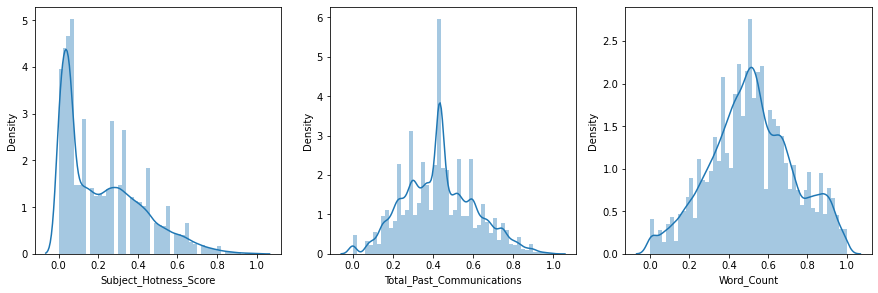

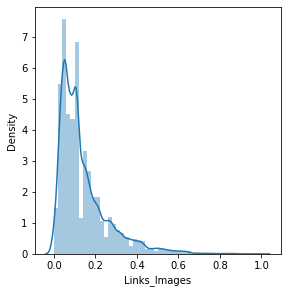

In [ ]:
ix = 1
fig = plt.figure(figsize = (15,10))
for c in numerical_col:
    if ix <= 3:
            ax1 = fig.add_subplot(2,3,ix)
            sns.distplot(email_data[c], ax=ax1)
            
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1

##**Now we are done with scaling ,it's time to perform one-hot encoding on our categorical data.**

#**One hot encoding**


In [ ]:
email_data.head()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Email_Status,Links_Images
0,1,0.44,2,E,2,0.492537,1,0.313480,0,0.076087
1,2,0.42,1,NaN,2,0.223881,2,0.363636,0,0.043478
2,2,0.02,1,B,3,0.537313,2,0.722571,1,0.043478
3,1,0.60,2,E,2,0.373134,2,0.446708,0,0.163043
4,1,0.00,2,C,3,0.268657,2,0.710815,0,0.032609


In [ ]:
cat_col=['Email_Type','Email_Source_Type','Email_Campaign_Type','Time_Email_sent_Category','Customer_Location']
email_data=pd.get_dummies(email_data, columns=cat_col)
email_data.drop('Email_Type_2',axis=1,inplace=True) #Since they have binary category
email_data.drop('Email_Source_Type_2',axis=1,inplace=True)

In [ ]:
#Pushing Email_Status at last of the DataFrame
list_of_col=list(email_data.columns)
list_of_col.remove('Email_Status')
list_of_col.append('Email_Status')
list_of_col
email_data=email_data[list_of_col]
email_data.head(2)

,Subject_Hotness_Score,Total_Past_Communications,Word_Count,Links_Images,Email_Type_1,Email_Source_Type_1,Email_Campaign_Type_1,Email_Campaign_Type_2,Email_Campaign_Type_3,Time_Email_sent_Category_1,Time_Email_sent_Category_2,Time_Email_sent_Category_3,Customer_Location_A,Customer_Location_B,Customer_Location_C,Customer_Location_D,Customer_Location_E,Customer_Location_F,Customer_Location_G,Email_Status
0,0.44,0.492537,0.313480,0.076087,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0
1,0.42,0.223881,0.363636,0.043478,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0


#**Feature Importance**

In [ ]:
def compute_impurity(feature):
    """
    This function calculates impurity of a feature.
    input: feature (this needs to be a Pandas series)
    output: feature impurity
    """
    probs = feature.value_counts(normalize=True)
    impurity = -1 * np.sum(np.log2(probs) * probs)   
    return(round(impurity, 3))

In [ ]:
def comp_feature_information_gain(df, target, descriptive_feature):
    """
    This function calculates information gain for splitting on 
    a particular descriptive feature for a given dataset
    and a given impurity criteria.
    Supported split criterion: 'entropy'
    """
    target_entropy = compute_impurity(df[target])

    # we define two lists below:
    # entropy_list to store the entropy of each partition
    # weight_list to store the relative number of observations in each partition
    entropy_list = list()
    weight_list = list()
    
    # loop over each level of the descriptive feature
    # to partition the dataset with respect to that level
    # and compute the entropy and the weight of the level's partition
    for level in df[descriptive_feature].unique():
        df_feature_level = df[df[descriptive_feature] == level]
        entropy_level = compute_impurity(df_feature_level[target])
        entropy_list.append(round(entropy_level, 3))
        weight_level = len(df_feature_level) / len(df)
        weight_list.append(round(weight_level, 3))

    feature_remaining_impurity = np.sum(np.array(entropy_list) * np.array(weight_list))
    
    
    information_gain = target_entropy - feature_remaining_impurity
    

    return(information_gain)

Subject_Hotness_Score : 0.03815999999999997
Total_Past_Communications : 0.08543499999999993
Word_Count : 0.04493199999999986
Links_Images : 0.023570999999999898
Email_Type_1 : 0.00040000000000006697
Email_Source_Type_1 : 4.899999999996574e-05
Email_Campaign_Type_1 : 0.017567
Email_Campaign_Type_2 : 0.050541999999999976
Email_Campaign_Type_3 : 0.03729300000000002
Time_Email_sent_Category_1 : -0.0008010000000000517
Time_Email_sent_Category_2 : -0.0006019999999999914
Time_Email_sent_Category_3 : 0.0
Customer_Location_A : -0.00025199999999991896
Customer_Location_B : -0.0005920000000000369
Customer_Location_C : -0.000496000000000052
Customer_Location_D : -0.0007840000000000069
Customer_Location_E : -0.0005330000000000057
Customer_Location_F : -0.00048000000000003595
Customer_Location_G : -0.00035600000000002296


Text(0.5, 1.0, 'Feature Importance')

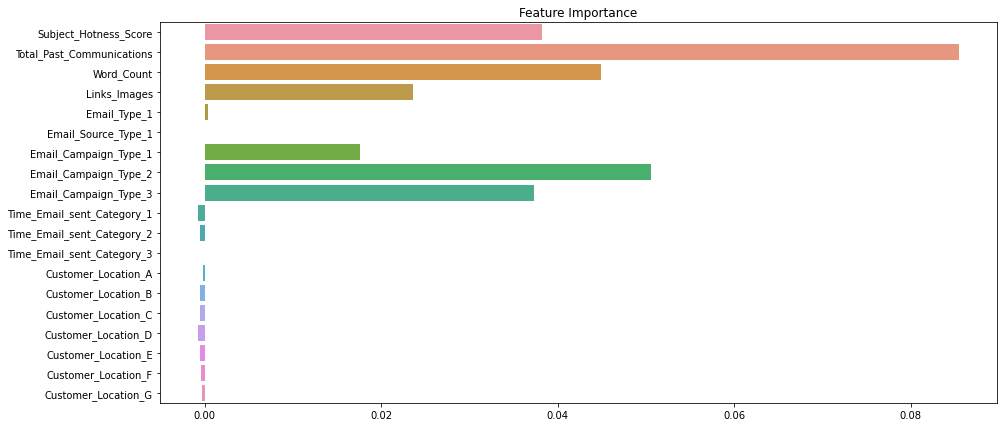

In [ ]:
info_gain={}
for feature in email_data.drop(columns='Email_Status').columns:
    feature_info_gain = comp_feature_information_gain(email_data, 'Email_Status', feature)
    info_gain[feature]=feature_info_gain
    print(feature, ':', feature_info_gain)
keys = list(info_gain.keys())
# get values in the same order as keys, and parse percentage values
vals = [float(info_gain[k]) for k in info_gain]
plt.figure(figsize=(15,7))
sns.barplot(y=keys, x=vals)
plt.title('Feature Importance')

We can observe that Time_Email_sent_Category_1,Time_Email_sent_Category_2,Time_Email_sent_Category_3 and Customer_Location have very less importance we can drop this feature.

In [ ]:
drop=['Time_Email_sent_Category_1','Time_Email_sent_Category_2','Time_Email_sent_Category_3',
      'Customer_Location_A','Customer_Location_B','Customer_Location_C','Customer_Location_D',
      'Customer_Location_E','Customer_Location_F','Customer_Location_G']
email_data.drop(drop,inplace=True,axis=1)

In [ ]:
email_data.head(1)

,Subject_Hotness_Score,Total_Past_Communications,Word_Count,Links_Images,Email_Type_1,Email_Source_Type_1,Email_Campaign_Type_1,Email_Campaign_Type_2,Email_Campaign_Type_3,Email_Status
0,0.44,0.492537,0.31348,0.076087,1,0,0,1,0,0


###**Now we are done with feature selection lets move to data imbalance handling.**

#**Imbalance Handling**


#**Random Under Sampling**

Undersampling can be defined as removing some observations of the majority class. This is done until the majority and minority class is balanced out.

Undersampling can be a good choice when you have a ton of data -think millions of rows. But a drawback to undersampling is that we are removing information that may be valuable.





In [ ]:
#X and Y 
X = email_data.drop('Email_Status',axis=1)
y = email_data['Email_Status']
print(f'Shape of X: {X.shape}')
print(f'Shape of Y: {y.shape}')

Shape of X: (68353, 9)
Shape of Y: (68353,)


In [ ]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y) 
#we need to stratify to get same proprtion of classes in both the sets

# **Random Undersampling**

In [ ]:
#importing random under sampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [ ]:
#resample
rus = RandomUnderSampler(random_state=42, replacement=True)
x_train_rus, y_train_rus = rus.fit_resample(X_train,y_train)

#print shape
print('Original dataset shape:', len(y_train))
print('Resampled dataset shape', len(y_train_rus))

Original dataset shape: 54682
Resampled dataset shape 5694


Class=0, n=1898 (33.333%)
Class=1, n=1898 (33.333%)
Class=2, n=1898 (33.333%)


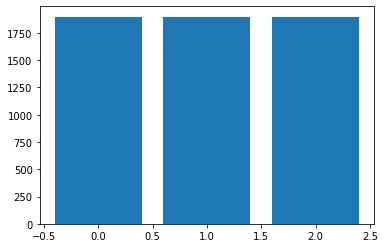

In [ ]:
#visualization of resampled data
def resampled_data_visual(y_train_rus):
  counter = Counter(y_train_rus)
  for key,value in counter.items():
    per = value / len(y_train_rus) * 100
    print('Class=%d, n=%d (%.3f%%)' % (key, value, per))
  # plot the distribution
  plt.bar(counter.keys(), counter.values())
  plt.show()

resampled_data_visual(y_train_rus)

# **SMOTE:**

In [ ]:
#importing SMOTE
from imblearn.over_sampling import SMOTE

In [ ]:
#SMOTE
smote = SMOTE()

# fit predictor and target variable
x_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print('Original dataset shape', len(y_train))
print('Resampled dataset shape', len(y_train_smote))


Original dataset shape 54682
Resampled dataset shape 131859


Class=1, n=43953 (33.333%)
Class=0, n=43953 (33.333%)
Class=2, n=43953 (33.333%)


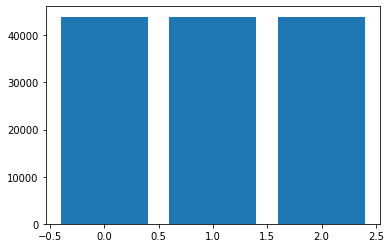

In [ ]:
#visualization of resampled data
resampled_data_visual(y_train_smote)

# **Under sampling Tomek Links**

In [ ]:
from imblearn.under_sampling import TomekLinks


In [ ]:
smotom= TomekLinks()
x_train_smotom, y_train_smotom = smotom.fit_resample(X_train, y_train)
print('Original dataset shape', len(y_train))
print('Resampled dataset shape', len(y_train_smotom))

Original dataset shape 54682
Resampled dataset shape 47430


Class=0, n=40207 (84.771%)
Class=2, n=1898 (4.002%)
Class=1, n=5325 (11.227%)


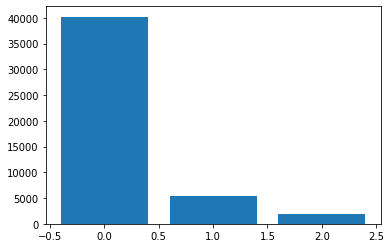

In [ ]:
resampled_data_visual(y_train_smotom)

# **Logistic Regression:**

# Logistic Regression is a classification algorithm that predicts the probability of an outcome that can have only two values.


# Multinomial logistic regression is an extension of logistic regression that adds native support for multi-class classification problems.

In [ ]:
#importing ML libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


%matplotlib inline

In [ ]:
#fitting Undersampling
logistic_rus = LogisticRegression(class_weight='balanced',multi_class='multinomial', solver='lbfgs')
logistic_rus.fit(x_train_rus, y_train_rus)

LogisticRegression(class_weight='balanced', multi_class='multinomial')

In [ ]:
#fitting on smote
logistic_smote = LogisticRegression(class_weight='balanced',multi_class='multinomial', solver='lbfgs')
logistic_smote.fit(x_train_smote, y_train_smote)

LogisticRegression(class_weight='balanced', multi_class='multinomial')

In [ ]:
#fitting on TomekLinks
logistic_smotom= LogisticRegression(class_weight='balanced',multi_class='multinomial', solver='lbfgs')
logistic_smotom.fit(x_train_smotom, y_train_smotom)

LogisticRegression(class_weight='balanced', multi_class='multinomial')

In [ ]:
#Columns needed to compare metrics
comparison_columns = ['Model_Name', 'Train_Accuracy', 'Train_Recall', 'Train_Precision', 'Train_F1score',
                      'Train_AUC' ,'Test_Accuracy', 'Test_Recall', 'Test_Precision', 'Test_F1score', 'Test_AUC']

In [ ]:
#Function to evaluate the model

def model_evaluation(model_name_RUS,model_name_SMOTE,model_name_somtom,model_var_rus, model_var_smote,model_var_smotom, x_train_rus, y_train_rus, x_train_smote, y_train_smote,
                     x_train_smotom, y_train_smotom, X_test, y_test):
  ''' This function predicts and evaluates various models for clasification for Random Undersampling and SMOTE algorithms, visualizes results 
      and creates a dataframe that compares the various models.'''
  
  #Making predictions random undersampling
  y_pred_rus_train = model_var_rus.predict(x_train_rus)
  y_pred_rus_test = model_var_rus.predict(X_test)
  #probs
  train_rus_proba = model_var_rus.predict_proba(x_train_rus)
  test_rus_proba = model_var_rus.predict_proba(X_test)

  #Making predictions smote
  y_pred_smote_train = model_var_smote.predict(x_train_smote)
  y_pred_smote_test = model_var_smote.predict(X_test)
  #probs
  train_sm_proba = model_var_smote.predict_proba(x_train_smote)
  test_sm_proba = model_var_smote.predict_proba(X_test)

  #Making predictions SmoteTomek
  y_pred_smotom_train = model_var_smotom.predict(x_train_smotom)
  y_pred_smotom_test = model_var_smotom.predict(X_test)
  #probs
  train_smt_proba = model_var_smotom.predict_proba(x_train_smotom)
  test_smt_proba = model_var_smotom.predict_proba(X_test)

  #Evaluation 
  #Accuracy RUS
  accuracy_rus_train = accuracy_score(y_train_rus,y_pred_rus_train)
  accuracy_rus_test = accuracy_score(y_test,y_pred_rus_test)
  #Accuracy SMOTE
  accuracy_smote_train = accuracy_score(y_train_smote,y_pred_smote_train)
  accuracy_smote_test = accuracy_score(y_test,y_pred_smote_test)
  #Accuracy SmoteTomek
  accuracy_smotom_train = accuracy_score(y_train_smotom,y_pred_smotom_train)
  accuracy_smotom_test = accuracy_score(y_test,y_pred_smotom_test)

  #Confusion Matrix RUS
  cm_rus_train = confusion_matrix(y_train_rus,y_pred_rus_train)
  cm_rus_test = confusion_matrix(y_test,y_pred_rus_test)
  #Confusion Matrix SMOTE
  cm_smote_train = confusion_matrix(y_train_smote,y_pred_smote_train)
  cm_smote_test = confusion_matrix(y_test,y_pred_smote_test)
  #Confusion Matrix SmoteTomek
  cm_smotom_train = confusion_matrix(y_train_smotom,y_pred_smotom_train)
  cm_smotom_test = confusion_matrix(y_test,y_pred_smotom_test)

  #Recall RUS
  train_recall_rus = recall_score(y_train_rus,y_pred_rus_train, average='weighted')
  test_recall_rus = recall_score(y_test,y_pred_rus_test, average='weighted')
  #Recall SMOTE
  train_recall_smote = recall_score(y_train_smote,y_pred_smote_train, average='weighted')
  test_recall_smote = recall_score(y_test,y_pred_smote_test, average='weighted')
  #Recall SmoteTomek
  train_recall_smotom = recall_score(y_train_smotom,y_pred_smotom_train, average='weighted')
  test_recall_smotom = recall_score(y_test,y_pred_smotom_test, average='weighted')

 #Precision RUS
  train_precision_rus = precision_score(y_train_rus,y_pred_rus_train, average='weighted')
  test_precision_rus = precision_score(y_test,y_pred_rus_test, average='weighted')
  #Precision SMOTE
  train_precision_smote = precision_score(y_train_smote,y_pred_smote_train, average='weighted')
  test_precision_smote = precision_score(y_test,y_pred_smote_test, average='weighted')
 #Precision SmoteTomek
  train_precision_smotom = precision_score(y_train_smotom,y_pred_smotom_train, average='weighted')
  test_precision_smotom = precision_score(y_test,y_pred_smotom_test, average='weighted')


  #F1 Score RUS
  train_f1_rus = f1_score(y_train_rus,y_pred_rus_train, average='weighted')
  test_f1_rus = f1_score(y_test,y_pred_rus_test, average='weighted')
  #F1 Score SMOTE
  train_f1_smote = f1_score(y_train_smote,y_pred_smote_train, average='weighted')
  test_f1_smote = f1_score(y_test,y_pred_smote_test, average='weighted')
  #F1 Score SmoteTomek
  train_f1_smotom = f1_score(y_train_smotom,y_pred_smotom_train, average='weighted')
  test_f1_smotom = f1_score(y_test,y_pred_smotom_test, average='weighted')

  #ROC-AUC RUS
  train_auc_rus = roc_auc_score(y_train_rus,train_rus_proba,average='weighted',multi_class = 'ovr')
  test_auc_rus = roc_auc_score(y_test,test_rus_proba,average='weighted',multi_class = 'ovr')
  #ROC-AUC SMOTE
  train_auc_smote = roc_auc_score(y_train_smote,train_sm_proba,average='weighted',multi_class = 'ovr')
  test_auc_smote = roc_auc_score(y_test,test_sm_proba,average='weighted',multi_class = 'ovr')
  #ROC-AUC SmoteTomek
  train_auc_smotom = roc_auc_score(y_train_smotom,train_smt_proba,average='weighted',multi_class = 'ovr')
  test_auc_smotom = roc_auc_score(y_test,test_smt_proba,average='weighted',multi_class = 'ovr')

  #Visualising Results RUS
  print("----- Evaluation on Random Undersampled data -----" + str(model_name_RUS) + "------")
  print("--------------- Train Data ------------\n")
  print("Confusion matrix \n")
  print(cm_rus_train)
  ax= plt.subplot()
  sns.heatmap(cm_rus_train, annot=True, ax = ax)
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title('Confusion Matrix Train '+ str(model_name_RUS))
  plt.show()
  print(classification_report(y_train_rus,y_pred_rus_train))

  print("--------------Test data ---------------\n")
  print("Confusion matrix \n")
  print(cm_rus_test)
  ax= plt.subplot()
  sns.heatmap(cm_rus_test, annot=True, ax = ax)
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title('Confusion Matrix Test '+ str(model_name_RUS))
  plt.show()
  print(classification_report(y_test,y_pred_rus_test))
  #create ROC curve
  fpr = {}
  tpr = {}
  thresh ={}
  no_of_class=3
  for i in range(no_of_class):    
      fpr[i], tpr[i], thresh[i] = metrics.roc_curve(y_test, test_rus_proba[:,i], pos_label=i)
  plt.plot(fpr[0], tpr[0], linestyle='--',color='blue', label='Class 0 vs Others'+"AUC="+str(test_auc_rus))
  plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Others'+"AUC="+str(test_auc_rus))
  plt.plot(fpr[2], tpr[2], linestyle='--',color='orange', label='Class 2 vs Others'+"AUC="+str(test_auc_rus))
  plt.title('Multiclass ROC curve of ' + str(model_name_RUS))
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.legend(loc=4)
  plt.show()




  #Visualising Results SMOTE
  print("----- Evaluation on SMOTE data -------" + str(model_name_SMOTE) + '-----')
  print("--------------- Train Data ------------\n")
  print("Confusion matrix \n")
  print(cm_smote_train)
  ax= plt.subplot()
  sns.heatmap(cm_smote_train, annot=True, ax = ax)
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title('Confusion Matrix Train ' + str(model_name_SMOTE))
  plt.show()
  print(classification_report(y_train_smote,y_pred_smote_train))

  print("---------------Test data ---------------\n")
  print("Confusion matrix \n")
  print(cm_smote_test)
  ax= plt.subplot()
  sns.heatmap(cm_smote_test, annot=True, ax = ax)
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title('Confusion Matrix Test ' + str(model_name_SMOTE))
  plt.show()
  print(classification_report(y_test,y_pred_smote_test))
  #create ROC curve
  fpr = {}
  tpr = {}
  thresh ={}
  no_of_class=3
  for i in range(no_of_class):    
      fpr[i], tpr[i], thresh[i] = metrics.roc_curve(y_test, test_sm_proba[:,i], pos_label=i)
  plt.plot(fpr[0], tpr[0], linestyle='--',color='blue', label='Class 0 vs Others'+" AUC="+str(test_auc_smote))
  plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Others'+" AUC="+str(test_auc_smote))
  plt.plot(fpr[2], tpr[2], linestyle='--',color='orange', label='Class 2 vs Others'+" AUC="+str(test_auc_smote))
  plt.title('Multiclass ROC curve of '+ str(model_name_SMOTE))
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.legend(loc=4)
  plt.show()

#Visualising Results SmoteTomek
  print("----- Evaluation on SMOTE data -------" + str(model_name_somtom) + '-----')
  print("--------------- Train Data ------------\n")
  print("Confusion matrix \n")
  print(cm_smotom_train)
  ax= plt.subplot()
  sns.heatmap(cm_smotom_train, annot=True, ax = ax)
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title('Confusion Matrix Train ' + str(model_name_somtom))
  plt.show()
  print(classification_report(y_train_smotom,y_pred_smotom_train))

  print("---------------Test data ---------------\n")
  print("Confusion matrix \n")
  print(cm_smotom_test)
  ax= plt.subplot()
  sns.heatmap(cm_smotom_test, annot=True, ax = ax)
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title('Confusion Matrix Test ' + str(model_name_somtom))
  plt.show()
  print(classification_report(y_test,y_pred_smotom_test))
  #create ROC curve
  fpr = {}
  tpr = {}
  thresh ={}
  no_of_class=3
  for i in range(no_of_class):    
      fpr[i], tpr[i], thresh[i] = metrics.roc_curve(y_test, test_smt_proba[:,i], pos_label=i)
  plt.plot(fpr[0], tpr[0], linestyle='--',color='blue', label='Class 0 vs Others'+" AUC="+str(test_auc_smotom))
  plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Others'+" AUC="+str(test_auc_smotom))
  plt.plot(fpr[2], tpr[2], linestyle='--',color='orange', label='Class 2 vs Others'+" AUC="+str(test_auc_smotom))
  plt.title('Multiclass ROC curve of '+ str(model_name_somtom))
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.legend(loc=4)
  plt.show()

  #Saving our results
  global comparison_columns
  metric_scores_rus = [model_name_RUS,accuracy_rus_train,train_recall_rus,train_precision_rus,train_f1_rus,train_auc_rus,accuracy_rus_test,test_recall_rus,test_precision_rus,test_f1_rus,test_auc_rus]
  final_dict_rus = dict(zip(comparison_columns,metric_scores_rus))

  metric_scores_smote = [model_name_SMOTE,accuracy_smote_train,train_recall_smote,train_precision_smote,train_f1_smote,train_auc_smote,accuracy_smote_test,test_recall_smote,test_precision_smote,test_f1_smote,test_auc_smote]
  final_dict_smote = dict(zip(comparison_columns,metric_scores_smote))

  metric_scores_smotom = [model_name_somtom,accuracy_smotom_train,train_recall_smotom,train_precision_smotom,train_f1_smotom,train_auc_smotom,accuracy_smotom_test,test_recall_smotom,test_precision_smotom,test_f1_smotom,test_auc_smotom]
  final_dict_smotom = dict(zip(comparison_columns,metric_scores_smotom))

  dict_list = [final_dict_rus,final_dict_smote,final_dict_smotom]
  return dict_list

In [ ]:
#function to create the comparison table
final_list = []
def add_list_to_final_df(dict_list):
  global final_list
  for elem in dict_list:
    final_list.append(elem)
  global comparison_df
  comparison_df = pd.DataFrame(final_list, columns= comparison_columns)

----- Evaluation on Random Undersampled data -----LogisticReg RUS------
--------------- Train Data ------------

Confusion matrix 

[[1337  219  342]
 [ 580  455  863]
 [ 342  273 1283]]


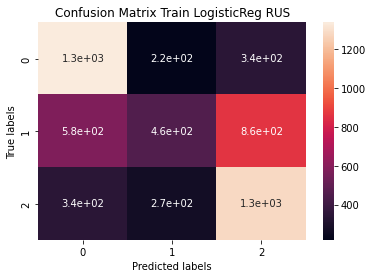

              precision    recall  f1-score   support

           0       0.59      0.70      0.64      1898
           1       0.48      0.24      0.32      1898
           2       0.52      0.68      0.59      1898

    accuracy                           0.54      5694
   macro avg       0.53      0.54      0.52      5694
weighted avg       0.53      0.54      0.52      5694

--------------Test data ---------------

Confusion matrix 

[[7678 1520 1790]
 [ 678  485 1045]
 [  94   62  319]]


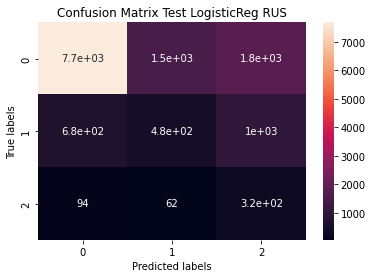

              precision    recall  f1-score   support

           0       0.91      0.70      0.79     10988
           1       0.23      0.22      0.23      2208
           2       0.10      0.67      0.18       475

    accuracy                           0.62     13671
   macro avg       0.41      0.53      0.40     13671
weighted avg       0.77      0.62      0.68     13671



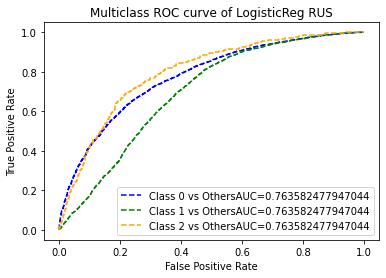

----- Evaluation on SMOTE data -------LogisticReg SMOTE-----
--------------- Train Data ------------

Confusion matrix 

[[30718  5781  7454]
 [13608  9409 20936]
 [ 8004  5772 30177]]


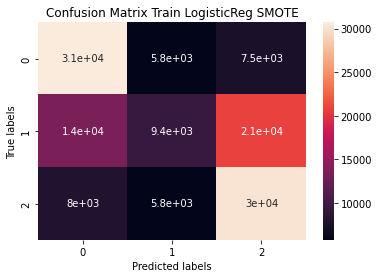

              precision    recall  f1-score   support

           0       0.59      0.70      0.64     43953
           1       0.45      0.21      0.29     43953
           2       0.52      0.69      0.59     43953

    accuracy                           0.53    131859
   macro avg       0.52      0.53      0.51    131859
weighted avg       0.52      0.53      0.51    131859

---------------Test data ---------------

Confusion matrix 

[[7749 1422 1817]
 [ 691  473 1044]
 [  97   61  317]]


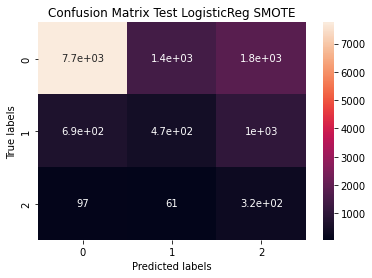

              precision    recall  f1-score   support

           0       0.91      0.71      0.79     10988
           1       0.24      0.21      0.23      2208
           2       0.10      0.67      0.17       475

    accuracy                           0.62     13671
   macro avg       0.42      0.53      0.40     13671
weighted avg       0.77      0.62      0.68     13671



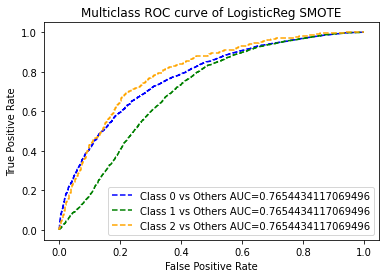

----- Evaluation on SMOTE data -------LogisticReg TomekLinks-----
--------------- Train Data ------------

Confusion matrix 

[[29495  4638  6074]
 [ 1442  1158  2725]
 [  348   258  1292]]


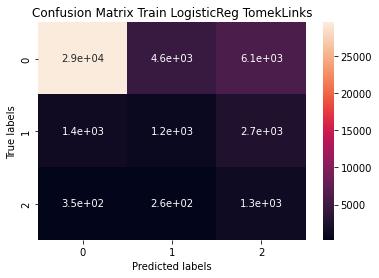

              precision    recall  f1-score   support

           0       0.94      0.73      0.83     40207
           1       0.19      0.22      0.20      5325
           2       0.13      0.68      0.22      1898

    accuracy                           0.67     47430
   macro avg       0.42      0.54      0.41     47430
weighted avg       0.83      0.67      0.73     47430

---------------Test data ---------------

Confusion matrix 

[[7819 1321 1848]
 [ 701  458 1049]
 [  98   62  315]]


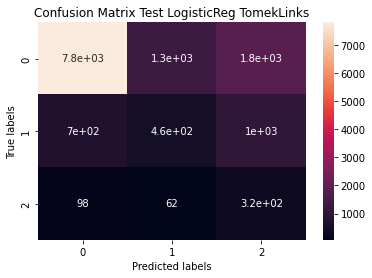

              precision    recall  f1-score   support

           0       0.91      0.71      0.80     10988
           1       0.25      0.21      0.23      2208
           2       0.10      0.66      0.17       475

    accuracy                           0.63     13671
   macro avg       0.42      0.53      0.40     13671
weighted avg       0.77      0.63      0.68     13671



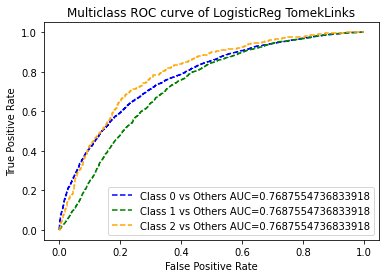

[{'Model_Name': 'LogisticReg RUS',
  'Test_AUC': 0.763582477947044,
  'Test_Accuracy': 0.6204374222807403,
  'Test_F1score': 0.6777128987595146,
  'Test_Precision': 0.7717249846979325,
  'Test_Recall': 0.6204374222807403,
  'Train_AUC': 0.7213915577856713,
  'Train_Accuracy': 0.5400421496311907,
  'Train_F1score': 0.5160516891851079,
  'Train_Precision': 0.5293315564332445,
  'Train_Recall': 0.5400421496311907},
 {'Model_Name': 'LogisticReg SMOTE',
  'Test_AUC': 0.7654434117069496,
  'Test_Accuracy': 0.6246068319801039,
  'Test_F1score': 0.6806968793662612,
  'Test_Precision': 0.7720782501899821,
  'Test_Recall': 0.6246068319801039,
  'Train_AUC': 0.7191043353285687,
  'Train_Accuracy': 0.5331755890762102,
  'Train_F1score': 0.5055562508447449,
  'Train_Precision': 0.5170404716420077,
  'Train_Recall': 0.5331755890762102},
 {'Model_Name': 'LogisticReg TomekLinks',
  'Test_AUC': 0.7687554736833918,
  'Test_Accuracy': 0.6284836515251262,
  'Test_F1score': 0.6835526215985306,
  'Test_Prec

In [ ]:
#Let's evaluate logistic reg
logistic_reg_list = model_evaluation('LogisticReg RUS','LogisticReg SMOTE','LogisticReg TomekLinks',logistic_rus, logistic_smote, logistic_smotom,x_train_rus, y_train_rus, 
                                     x_train_smote, y_train_smote,x_train_smotom, y_train_smotom, X_test, y_test)
logistic_reg_list

In [ ]:
#adding result to final list
add_list_to_final_df(logistic_reg_list)

In [ ]:
#Taking a look of our final comparison dataframe
comparison_df

,Model_Name,Train_Accuracy,Train_Recall,Train_Precision,Train_F1score,Train_AUC,Test_Accuracy,Test_Recall,Test_Precision,Test_F1score,Test_AUC
0,LogisticReg RUS,0.540042,0.540042,0.529332,0.516052,0.721392,0.620437,0.620437,0.771725,0.677713,0.763582
1,LogisticReg SMOTE,0.533176,0.533176,0.517040,0.505556,0.719104,0.624607,0.624607,0.772078,0.680697,0.765443
2,LogisticReg TomekLinks,0.673519,0.673519,0.825808,0.730946,0.810343,0.628484,0.628484,0.772815,0.683553,0.768755


# **Decison Tree Model:**

Decision Trees are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

Decision Trees are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

In [ ]:
#Classifier RUS
dt_rus = DecisionTreeClassifier()
dt_rus.fit(x_train_rus,y_train_rus)

DecisionTreeClassifier()

In [ ]:
#Classifier SMOTE
dt_smote = DecisionTreeClassifier()
dt_smote.fit(x_train_smote,y_train_smote)

DecisionTreeClassifier()

In [ ]:
#Classifier TomekLinks
dt_smotom = DecisionTreeClassifier()
dt_smotom.fit(x_train_smotom,y_train_smotom)

DecisionTreeClassifier()

----- Evaluation on Random Undersampled data -----Decision Tree RUS------
--------------- Train Data ------------

Confusion matrix 

[[1898    0    0]
 [   3 1895    0]
 [   0    5 1893]]


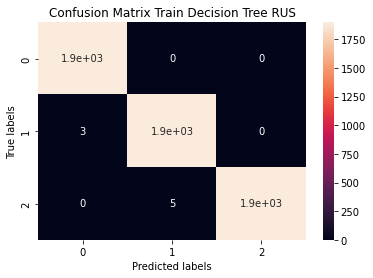

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1898
           1       1.00      1.00      1.00      1898
           2       1.00      1.00      1.00      1898

    accuracy                           1.00      5694
   macro avg       1.00      1.00      1.00      5694
weighted avg       1.00      1.00      1.00      5694

--------------Test data ---------------

Confusion matrix 

[[5691 2964 2333]
 [ 666  729  813]
 [ 114  148  213]]


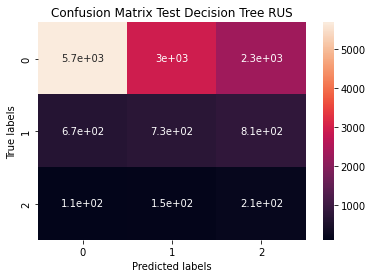

              precision    recall  f1-score   support

           0       0.88      0.52      0.65     10988
           1       0.19      0.33      0.24      2208
           2       0.06      0.45      0.11       475

    accuracy                           0.49     13671
   macro avg       0.38      0.43      0.33     13671
weighted avg       0.74      0.49      0.57     13671



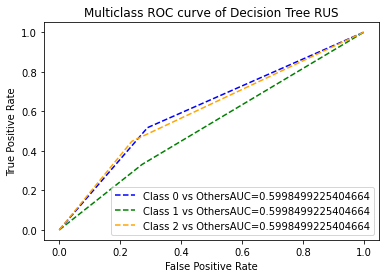

----- Evaluation on SMOTE data -------Decision Tree SMOTE-----
--------------- Train Data ------------

Confusion matrix 

[[43951     2     0]
 [  103 43849     1]
 [   30    33 43890]]


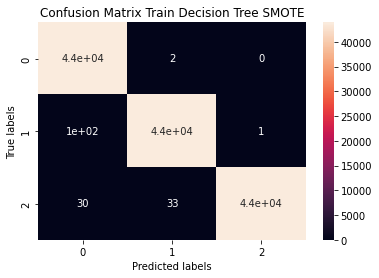

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43953
           1       1.00      1.00      1.00     43953
           2       1.00      1.00      1.00     43953

    accuracy                           1.00    131859
   macro avg       1.00      1.00      1.00    131859
weighted avg       1.00      1.00      1.00    131859

---------------Test data ---------------

Confusion matrix 

[[8795 1750  443]
 [1335  621  252]
 [ 254  151   70]]


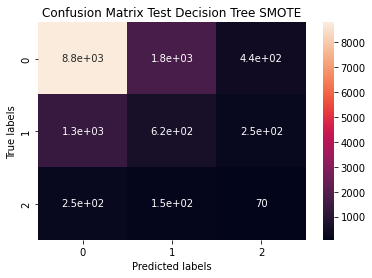

              precision    recall  f1-score   support

           0       0.85      0.80      0.82     10988
           1       0.25      0.28      0.26      2208
           2       0.09      0.15      0.11       475

    accuracy                           0.69     13671
   macro avg       0.39      0.41      0.40     13671
weighted avg       0.72      0.69      0.71     13671



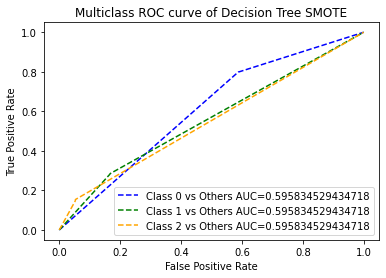

----- Evaluation on SMOTE data -------Decision Tree TomekLinks-----
--------------- Train Data ------------

Confusion matrix 

[[40205     2     0]
 [  103  5221     1]
 [   30    33  1835]]


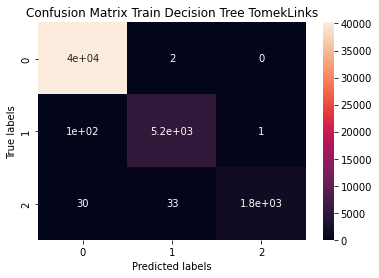

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     40207
           1       0.99      0.98      0.99      5325
           2       1.00      0.97      0.98      1898

    accuracy                           1.00     47430
   macro avg       1.00      0.98      0.99     47430
weighted avg       1.00      1.00      1.00     47430

---------------Test data ---------------

Confusion matrix 

[[9366 1208  414]
 [1420  556  232]
 [ 283  120   72]]


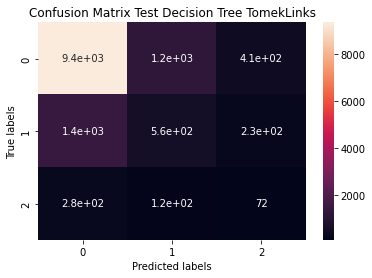

              precision    recall  f1-score   support

           0       0.85      0.85      0.85     10988
           1       0.30      0.25      0.27      2208
           2       0.10      0.15      0.12       475

    accuracy                           0.73     13671
   macro avg       0.41      0.42      0.41     13671
weighted avg       0.73      0.73      0.73     13671



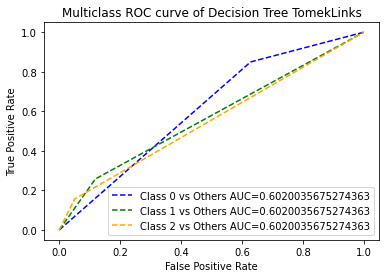

[{'Model_Name': 'Decision Tree RUS',
  'Test_AUC': 0.5998499225404664,
  'Test_Accuracy': 0.48518762343647137,
  'Test_F1score': 0.5667729842481075,
  'Test_Precision': 0.7397203766892289,
  'Test_Recall': 0.48518762343647137,
  'Train_AUC': 0.9999977329953369,
  'Train_Accuracy': 0.9985950122936424,
  'Train_F1score': 0.9985950111715804,
  'Train_Precision': 0.9985967680906632,
  'Train_Recall': 0.9985950122936424},
 {'Model_Name': 'Decision Tree SMOTE',
  'Test_AUC': 0.595834529434718,
  'Test_Accuracy': 0.6938775510204082,
  'Test_F1score': 0.7078459521154884,
  'Test_Precision': 0.7237012960612467,
  'Test_Recall': 0.6938775510204082,
  'Train_AUC': 0.9999982008761007,
  'Train_Accuracy': 0.9987183279108744,
  'Train_F1score': 0.998718504309812,
  'Train_Precision': 0.9987208971607529,
  'Train_Recall': 0.9987183279108744},
 {'Model_Name': 'Decision Tree TomekLinks',
  'Test_AUC': 0.6020035675274363,
  'Test_Accuracy': 0.7310365006217541,
  'Test_F1score': 0.7306680649602395,
  'Te

In [ ]:
dt_eval_list = model_evaluation('Decision Tree RUS', 'Decision Tree SMOTE','Decision Tree TomekLinks', dt_rus, dt_smote, dt_smotom,x_train_rus, y_train_rus,
                                x_train_smote, y_train_smote, x_train_smotom,y_train_smotom,X_test, y_test)
dt_eval_list

In [ ]:
#adding list
add_list_to_final_df(dt_eval_list)
#Taking a look of our final comparison dataframe
comparison_df

,Model_Name,Train_Accuracy,Train_Recall,Train_Precision,Train_F1score,Train_AUC,Test_Accuracy,Test_Recall,Test_Precision,Test_F1score,Test_AUC
0,LogisticReg RUS,0.540042,0.540042,0.529332,0.516052,0.721392,0.620437,0.620437,0.771725,0.677713,0.763582
1,LogisticReg SMOTE,0.533176,0.533176,0.517040,0.505556,0.719104,0.624607,0.624607,0.772078,0.680697,0.765443
2,LogisticReg TomekLinks,0.673519,0.673519,0.825808,0.730946,0.810343,0.628484,0.628484,0.772815,0.683553,0.768755
3,Decision Tree RUS,0.998595,0.998595,0.998597,0.998595,0.999998,0.485188,0.485188,0.739720,0.566773,0.599850
4,Decision Tree SMOTE,0.998718,0.998718,0.998721,0.998719,0.999998,0.693878,0.693878,0.723701,0.707846,0.595835
5,Decision Tree TomekLinks,0.996437,0.996437,0.996436,0.996418,0.999968,0.731037,0.731037,0.731235,0.730668,0.602004


# **Observation: Clearly Decision Tree models are overfitting. in all the datasets, whether undersampled or oversampled with SMOTE and TomekLinks are working really well on train data but not on test data.**

# **Random Forest Model:**

**To prevent overfitting, we will be building random forest model. Random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction. The ensemble models with only one tree will overfit to data as well because it is the same as a single decision tree. When we add trees to the Random Forest then the tendency to overfitting decreases.**

In [ ]:
#RUS
rf_rus = RandomForestClassifier(random_state=42, max_depth=5, n_estimators=100, oob_score=True)
rf_rus.fit(x_train_rus,y_train_rus)

RandomForestClassifier(max_depth=5, oob_score=True, random_state=42)

In [ ]:
#SMOTE
rf_smote = RandomForestClassifier(random_state=42, max_depth=5, n_estimators=100, oob_score=True)
rf_smote.fit(x_train_smote,y_train_smote)

RandomForestClassifier(max_depth=5, oob_score=True, random_state=42)

In [ ]:
#TomekLinks
rf_smotom = RandomForestClassifier(random_state=42, max_depth=5, n_estimators=100, oob_score=True)
rf_smotom.fit(x_train_smotom,y_train_smotom)

RandomForestClassifier(max_depth=5, oob_score=True, random_state=42)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


----- Evaluation on Random Undersampled data -----Random Forest RUS------
--------------- Train Data ------------

Confusion matrix 

[[1386  191  321]
 [ 535  530  833]
 [ 307  276 1315]]


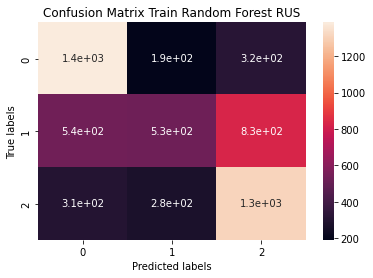

              precision    recall  f1-score   support

           0       0.62      0.73      0.67      1898
           1       0.53      0.28      0.37      1898
           2       0.53      0.69      0.60      1898

    accuracy                           0.57      5694
   macro avg       0.56      0.57      0.55      5694
weighted avg       0.56      0.57      0.55      5694

--------------Test data ---------------

Confusion matrix 

[[7794 1380 1814]
 [ 687  500 1021]
 [  92   65  318]]


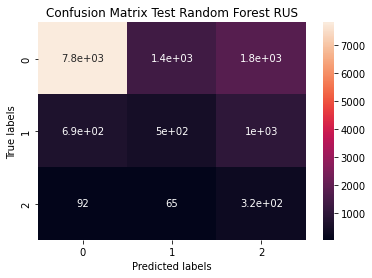

              precision    recall  f1-score   support

           0       0.91      0.71      0.80     10988
           1       0.26      0.23      0.24      2208
           2       0.10      0.67      0.18       475

    accuracy                           0.63     13671
   macro avg       0.42      0.54      0.40     13671
weighted avg       0.78      0.63      0.69     13671



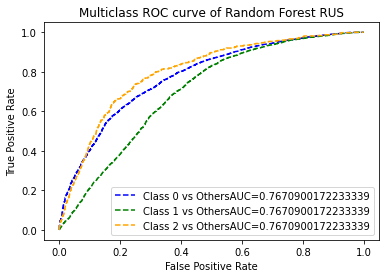

----- Evaluation on SMOTE data -------Random Forest SMOTE-----
--------------- Train Data ------------

Confusion matrix 

[[33015  5728  5210]
 [13672 12081 18200]
 [ 6951  7431 29571]]


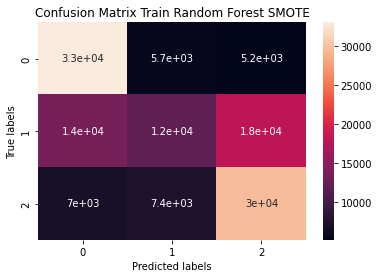

              precision    recall  f1-score   support

           0       0.62      0.75      0.68     43953
           1       0.48      0.27      0.35     43953
           2       0.56      0.67      0.61     43953

    accuracy                           0.57    131859
   macro avg       0.55      0.57      0.55    131859
weighted avg       0.55      0.57      0.55    131859

---------------Test data ---------------

Confusion matrix 

[[8352 1357 1279]
 [ 807  583  818]
 [ 104  100  271]]


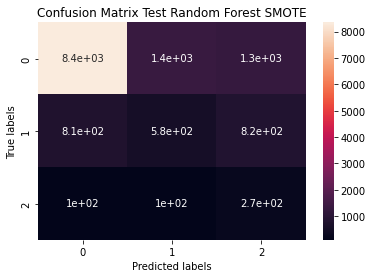

              precision    recall  f1-score   support

           0       0.90      0.76      0.82     10988
           1       0.29      0.26      0.27      2208
           2       0.11      0.57      0.19       475

    accuracy                           0.67     13671
   macro avg       0.43      0.53      0.43     13671
weighted avg       0.77      0.67      0.71     13671



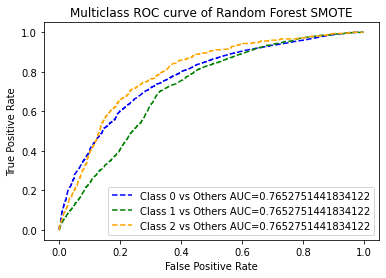

----- Evaluation on SMOTE data -------Random Forest TomekLinks-----
--------------- Train Data ------------

Confusion matrix 

[[40159    48     0]
 [ 4969   356     0]
 [ 1750   148     0]]


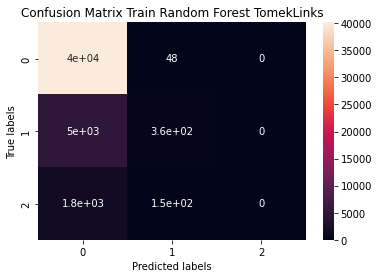

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.86      1.00      0.92     40207
           1       0.64      0.07      0.12      5325
           2       0.00      0.00      0.00      1898

    accuracy                           0.85     47430
   macro avg       0.50      0.36      0.35     47430
weighted avg       0.80      0.85      0.80     47430

---------------Test data ---------------

Confusion matrix 

[[10970    18     0]
 [ 2107   101     0]
 [  441    34     0]]


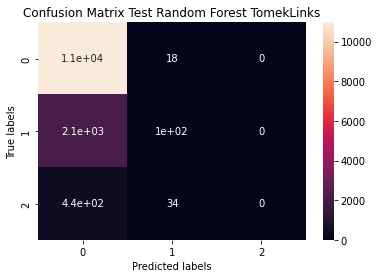

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.81      1.00      0.90     10988
           1       0.66      0.05      0.09      2208
           2       0.00      0.00      0.00       475

    accuracy                           0.81     13671
   macro avg       0.49      0.35      0.33     13671
weighted avg       0.76      0.81      0.73     13671



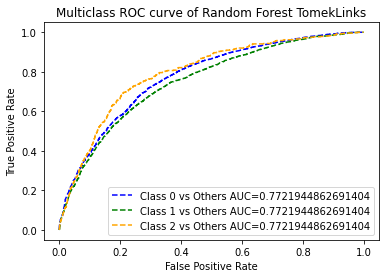

[{'Model_Name': 'Random Forest RUS',
  'Test_AUC': 0.7670900172233339,
  'Test_Accuracy': 0.6299466022968327,
  'Test_F1score': 0.6854787282454036,
  'Test_Precision': 0.7757349858232613,
  'Test_Recall': 0.6299466022968327,
  'Train_AUC': 0.7533517432618144,
  'Train_Accuracy': 0.5674394099051633,
  'Train_F1score': 0.5467432552826074,
  'Train_Precision': 0.5620938876224879,
  'Train_Recall': 0.5674394099051633},
 {'Model_Name': 'Random Forest SMOTE',
  'Test_AUC': 0.7652751441834122,
  'Test_Accuracy': 0.6733962402165167,
  'Test_F1score': 0.7139231791666778,
  'Test_Precision': 0.7748314843982123,
  'Test_Recall': 0.6733962402165167,
  'Train_AUC': 0.7584964544508992,
  'Train_Accuracy': 0.5662639637794917,
  'Train_F1score': 0.5453076425022425,
  'Train_Precision': 0.5507678710673518,
  'Train_Recall': 0.5662639637794917},
 {'Model_Name': 'Random Forest TomekLinks',
  'Test_AUC': 0.7721944862691404,
  'Test_Accuracy': 0.8098163996781508,
  'Test_F1score': 0.733404047495309,
  'Tes

In [ ]:
#Random Forest Evaluation
rf_eval_list = model_evaluation('Random Forest RUS', 'Random Forest SMOTE','Random Forest TomekLinks', rf_rus, rf_smote,rf_smotom, x_train_rus, y_train_rus,
                                x_train_smote, y_train_smote,x_train_smotom,y_train_smotom, X_test, y_test)
rf_eval_list

In [ ]:
#adding list
add_list_to_final_df(rf_eval_list)
#Taking a look of our final comparison dataframe
comparison_df

,Model_Name,Train_Accuracy,Train_Recall,Train_Precision,Train_F1score,Train_AUC,Test_Accuracy,Test_Recall,Test_Precision,Test_F1score,Test_AUC
0,LogisticReg RUS,0.540042,0.540042,0.529332,0.516052,0.721392,0.620437,0.620437,0.771725,0.677713,0.763582
1,LogisticReg SMOTE,0.533176,0.533176,0.517040,0.505556,0.719104,0.624607,0.624607,0.772078,0.680697,0.765443
2,LogisticReg TomekLinks,0.673519,0.673519,0.825808,0.730946,0.810343,0.628484,0.628484,0.772815,0.683553,0.768755
3,Decision Tree RUS,0.998595,0.998595,0.998597,0.998595,0.999998,0.485188,0.485188,0.739720,0.566773,0.599850
4,Decision Tree SMOTE,0.998718,0.998718,0.998721,0.998719,0.999998,0.693878,0.693878,0.723701,0.707846,0.595835
5,Decision Tree TomekLinks,0.996437,0.996437,0.996436,0.996418,0.999968,0.731037,0.731037,0.731235,0.730668,0.602004
6,Random Forest RUS,0.567439,0.567439,0.562094,0.546743,0.753352,0.629947,0.629947,0.775735,0.685479,0.767090
7,Random Forest SMOTE,0.566264,0.566264,0.550768,0.545308,0.758496,0.673396,0.673396,0.774831,0.713923,0.765275
8,Random Forest TomekLinks,0.854206,0.854206,0.798617,0.795442,0.820661,0.809816,0.809816,0.758865,0.733404,0.772194


#**Random Forest Hyperparameter Tuning:**

In [ ]:
#classifier
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [ ]:
#Parameter dictionary
params = {'max_depth': [3,5,10,20],'min_samples_leaf': [5,10,20,50,100],'n_estimators': [10,25,30,50,100,200]}

In [ ]:
#Grid Search to get the best parameters
grid_search = GridSearchCV(estimator=rf, param_grid=params, cv = 4, n_jobs=-1, verbose=1, scoring="f1_weighted")

In [ ]:
#Fitting RUS to grid search
grid_search.fit(x_train_rus,y_train_rus)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='f1_weighted', verbose=1)

In [ ]:
#optimal model
rf_tuned_rus = grid_search.best_estimator_

In [ ]:
#Fitting SMOTE
grid_search_smote = GridSearchCV(estimator=rf, param_grid=params, cv = 4, n_jobs=-1, verbose=1, scoring="f1_weighted")
grid_search_smote.fit(x_train_smote,y_train_smote)
#optimal smote model
rf_tuned_smote = grid_search_smote.best_estimator_

Fitting 4 folds for each of 120 candidates, totalling 480 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [ ]:
#Fitting TomekLinks
grid_search_smotom = GridSearchCV(estimator=rf, param_grid=params, cv = 4, n_jobs=-1, verbose=1, scoring="f1_weighted")
grid_search_smotom.fit(x_train_smotom,y_train_smotom)
#optimal TomekLinks model
rf_tuned_smotom = grid_search_smotom.best_estimator_

Fitting 4 folds for each of 120 candidates, totalling 480 fits


----- Evaluation on Random Undersampled data -----RandomF Tuned RUS------
--------------- Train Data ------------

Confusion matrix 

[[1500  179  219]
 [ 281 1276  341]
 [ 222  202 1474]]


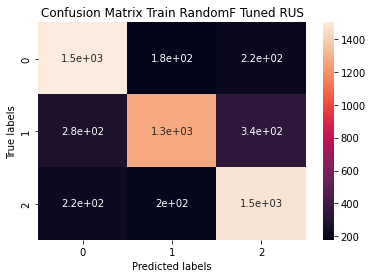

              precision    recall  f1-score   support

           0       0.75      0.79      0.77      1898
           1       0.77      0.67      0.72      1898
           2       0.72      0.78      0.75      1898

    accuracy                           0.75      5694
   macro avg       0.75      0.75      0.75      5694
weighted avg       0.75      0.75      0.75      5694

--------------Test data ---------------

Confusion matrix 

[[7358 2172 1458]
 [ 593  741  874]
 [  83  123  269]]


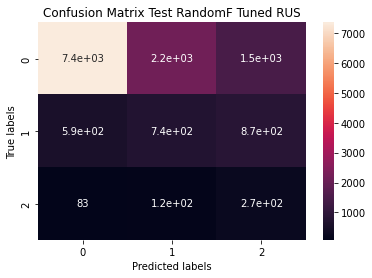

              precision    recall  f1-score   support

           0       0.92      0.67      0.77     10988
           1       0.24      0.34      0.28      2208
           2       0.10      0.57      0.17       475

    accuracy                           0.61     13671
   macro avg       0.42      0.52      0.41     13671
weighted avg       0.78      0.61      0.67     13671



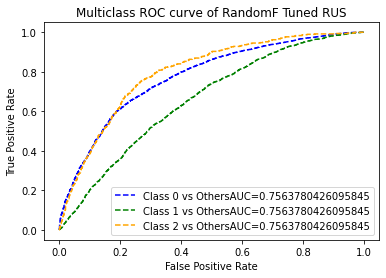

----- Evaluation on SMOTE data -------RandomF Tuned SMOTE-----
--------------- Train Data ------------

Confusion matrix 

[[40322  2701   930]
 [ 3763 36971  3219]
 [  742  1013 42198]]


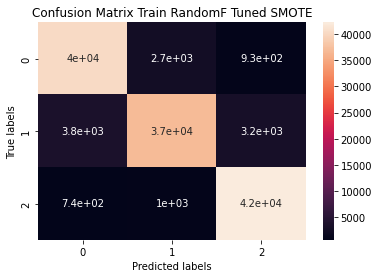

              precision    recall  f1-score   support

           0       0.90      0.92      0.91     43953
           1       0.91      0.84      0.87     43953
           2       0.91      0.96      0.93     43953

    accuracy                           0.91    131859
   macro avg       0.91      0.91      0.91    131859
weighted avg       0.91      0.91      0.91    131859

---------------Test data ---------------

Confusion matrix 

[[9460 1204  324]
 [1195  742  271]
 [ 211  199   65]]


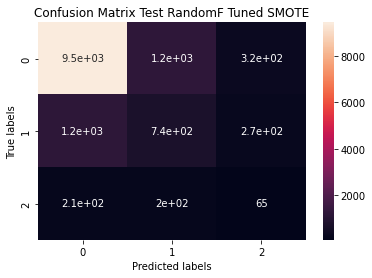

              precision    recall  f1-score   support

           0       0.87      0.86      0.87     10988
           1       0.35      0.34      0.34      2208
           2       0.10      0.14      0.11       475

    accuracy                           0.75     13671
   macro avg       0.44      0.44      0.44     13671
weighted avg       0.76      0.75      0.75     13671



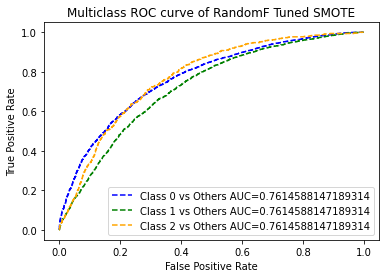

----- Evaluation on SMOTE data -------RandomF Tuned TomekLinks-----
--------------- Train Data ------------

Confusion matrix 

[[39890   291    26]
 [ 3492  1782    51]
 [ 1300   342   256]]


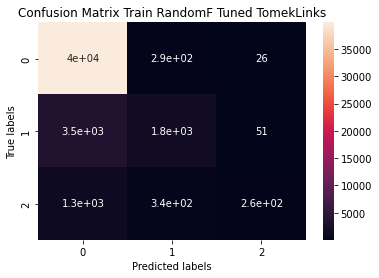

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     40207
           1       0.74      0.33      0.46      5325
           2       0.77      0.13      0.23      1898

    accuracy                           0.88     47430
   macro avg       0.80      0.49      0.54     47430
weighted avg       0.87      0.88      0.86     47430

---------------Test data ---------------

Confusion matrix 

[[10679   284    25]
 [ 1802   356    50]
 [  361    99    15]]


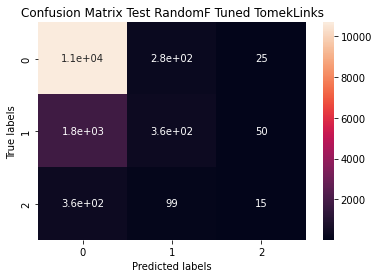

              precision    recall  f1-score   support

           0       0.83      0.97      0.90     10988
           1       0.48      0.16      0.24      2208
           2       0.17      0.03      0.05       475

    accuracy                           0.81     13671
   macro avg       0.49      0.39      0.40     13671
weighted avg       0.75      0.81      0.76     13671



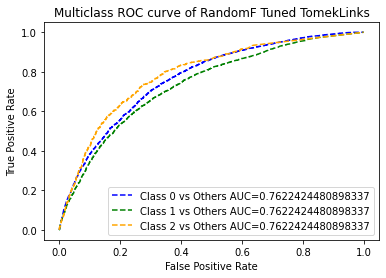

[{'Model_Name': 'RandomF Tuned RUS',
  'Test_AUC': 0.7563780426095845,
  'Test_Accuracy': 0.612098602882013,
  'Test_F1score': 0.6735228564802869,
  'Test_Precision': 0.7791293828552379,
  'Test_Recall': 0.612098602882013,
  'Train_AUC': 0.9116385891199321,
  'Train_Accuracy': 0.7463997190024587,
  'Train_F1score': 0.7455471411989943,
  'Train_Precision': 0.7478745008835894,
  'Train_Recall': 0.7463997190024587},
 {'Model_Name': 'RandomF Tuned SMOTE',
  'Test_AUC': 0.7614588147189314,
  'Test_Accuracy': 0.7510057786555483,
  'Test_F1score': 0.7548792741313656,
  'Test_Precision': 0.7590364412387787,
  'Test_Recall': 0.7510057786555483,
  'Train_AUC': 0.9833035545199428,
  'Train_Accuracy': 0.9062028378798566,
  'Train_F1score': 0.9055340606301562,
  'Train_Precision': 0.9062318198819924,
  'Train_Recall': 0.9062028378798566},
 {'Model_Name': 'RandomF Tuned TomekLinks',
  'Test_AUC': 0.7622424480898337,
  'Test_Accuracy': 0.808280301367859,
  'Test_F1score': 0.7612347146386916,
  'Test_

In [ ]:
#Model Evaluation for Random Forest Hyperparameter Tuned
rf_tuned_list = model_evaluation('RandomF Tuned RUS', 'RandomF Tuned SMOTE','RandomF Tuned TomekLinks',rf_tuned_rus, rf_tuned_smote,rf_tuned_smotom,x_train_rus, y_train_rus,
                                 x_train_smote, y_train_smote,x_train_smotom,y_train_smotom, X_test, y_test)
rf_tuned_list

In [ ]:
#adding list
add_list_to_final_df(rf_tuned_list)
#Taking a look of our final comparison dataframe
comparison_df

,Model_Name,Train_Accuracy,Train_Recall,Train_Precision,Train_F1score,Train_AUC,Test_Accuracy,Test_Recall,Test_Precision,Test_F1score,Test_AUC
0,LogisticReg RUS,0.540042,0.540042,0.529332,0.516052,0.721392,0.620437,0.620437,0.771725,0.677713,0.763582
1,LogisticReg SMOTE,0.533176,0.533176,0.517040,0.505556,0.719104,0.624607,0.624607,0.772078,0.680697,0.765443
2,LogisticReg TomekLinks,0.673519,0.673519,0.825808,0.730946,0.810343,0.628484,0.628484,0.772815,0.683553,0.768755
3,Decision Tree RUS,0.998595,0.998595,0.998597,0.998595,0.999998,0.485188,0.485188,0.739720,0.566773,0.599850
4,Decision Tree SMOTE,0.998718,0.998718,0.998721,0.998719,0.999998,0.693878,0.693878,0.723701,0.707846,0.595835
5,Decision Tree TomekLinks,0.996437,0.996437,0.996436,0.996418,0.999968,0.731037,0.731037,0.731235,0.730668,0.602004
6,Random Forest RUS,0.567439,0.567439,0.562094,0.546743,0.753352,0.629947,0.629947,0.775735,0.685479,0.767090
7,Random Forest SMOTE,0.566264,0.566264,0.550768,0.545308,0.758496,0.673396,0.673396,0.774831,0.713923,0.765275
8,Random Forest TomekLinks,0.854206,0.854206,0.798617,0.795442,0.820661,0.809816,0.809816,0.758865,0.733404,0.772194
9,RandomF Tuned RUS,0.746400,0.746400,0.747875,0.745547,0.911639,0.612099,0.612099,0.779129,0.673523,0.756378


# **Random Forest HyperParameter Tuned Feature Importance:**

In [ ]:
#feature importance by random forest 
feature_imp = pd.DataFrame({"Variable": x_train_smote.columns,"Importance": rf_tuned_smote.feature_importances_})
feature_imp.sort_values(by="Importance", ascending=False, inplace = True)


In [ ]:
feature_imp


,Variable,Importance
1,Total_Past_Communications,0.255526
2,Word_Count,0.222580
0,Subject_Hotness_Score,0.200644
3,Links_Images,0.192006
7,Email_Campaign_Type_2,0.063654
8,Email_Campaign_Type_3,0.020265
4,Email_Type_1,0.019001
5,Email_Source_Type_1,0.018368
6,Email_Campaign_Type_1,0.007955


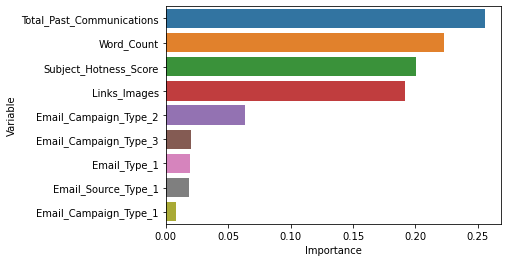

In [ ]:
#visualisation
sns.barplot(x=feature_imp['Importance'],y= feature_imp['Variable'])

From above plot we can see that Total_Past_Communications feature is having higher feature importances compared to others

# **KNN Classification Model:**

# The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other. KNN uses the concept of similarity in terms of distance.

In [ ]:
#RUS fitting
knn_rus = KNeighborsClassifier()
knn_rus.fit(x_train_rus,y_train_rus)

KNeighborsClassifier()

In [ ]:
#SMOTE fitting
knn_smote = KNeighborsClassifier()
knn_smote.fit(x_train_smote,y_train_smote)

KNeighborsClassifier()

In [ ]:
#TomekLinks fitting
knn_smotom = KNeighborsClassifier()
knn_smotom.fit(x_train_smotom,y_train_smotom)

KNeighborsClassifier()

----- Evaluation on Random Undersampled data -----KNN RUS------
--------------- Train Data ------------

Confusion matrix 

[[1473  284  141]
 [ 459 1105  334]
 [ 321  463 1114]]


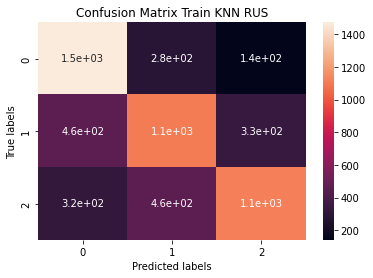

              precision    recall  f1-score   support

           0       0.65      0.78      0.71      1898
           1       0.60      0.58      0.59      1898
           2       0.70      0.59      0.64      1898

    accuracy                           0.65      5694
   macro avg       0.65      0.65      0.65      5694
weighted avg       0.65      0.65      0.65      5694

--------------Test data ---------------

Confusion matrix 

[[7138 2552 1298]
 [ 674  846  688]
 [ 101  181  193]]


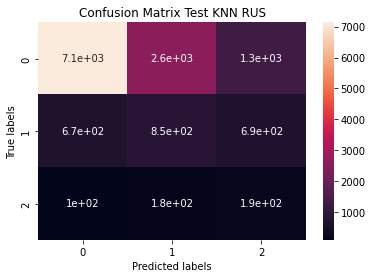

              precision    recall  f1-score   support

           0       0.90      0.65      0.76     10988
           1       0.24      0.38      0.29      2208
           2       0.09      0.41      0.15       475

    accuracy                           0.60     13671
   macro avg       0.41      0.48      0.40     13671
weighted avg       0.77      0.60      0.66     13671



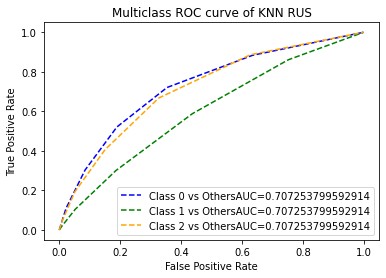

----- Evaluation on SMOTE data -------KNN SMOTE-----
--------------- Train Data ------------

Confusion matrix 

[[32128  8272  3553]
 [ 1072 41551  1330]
 [  403   874 42676]]


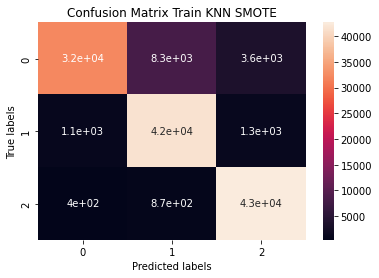

              precision    recall  f1-score   support

           0       0.96      0.73      0.83     43953
           1       0.82      0.95      0.88     43953
           2       0.90      0.97      0.93     43953

    accuracy                           0.88    131859
   macro avg       0.89      0.88      0.88    131859
weighted avg       0.89      0.88      0.88    131859

---------------Test data ---------------

Confusion matrix 

[[7068 2760 1160]
 [ 784  917  507]
 [ 139  205  131]]


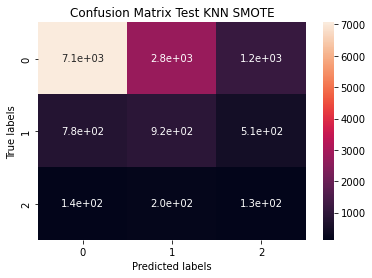

              precision    recall  f1-score   support

           0       0.88      0.64      0.74     10988
           1       0.24      0.42      0.30      2208
           2       0.07      0.28      0.12       475

    accuracy                           0.59     13671
   macro avg       0.40      0.44      0.39     13671
weighted avg       0.75      0.59      0.65     13671



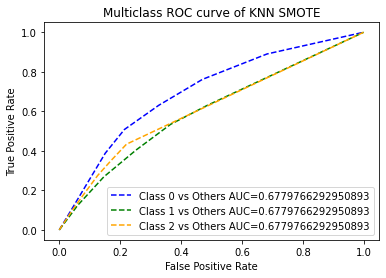

----- Evaluation on SMOTE data -------KNN TomekLinks-----
--------------- Train Data ------------

Confusion matrix 

[[39595   558    54]
 [ 3238  2014    73]
 [ 1268   383   247]]


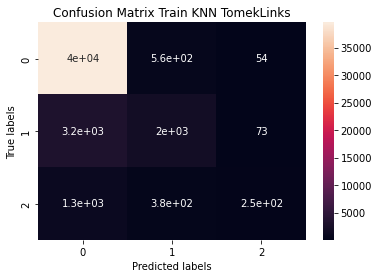

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     40207
           1       0.68      0.38      0.49      5325
           2       0.66      0.13      0.22      1898

    accuracy                           0.88     47430
   macro avg       0.75      0.50      0.55     47430
weighted avg       0.86      0.88      0.86     47430

---------------Test data ---------------

Confusion matrix 

[[10507   431    50]
 [ 1753   385    70]
 [  345   109    21]]


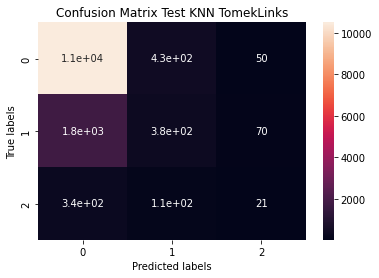

              precision    recall  f1-score   support

           0       0.83      0.96      0.89     10988
           1       0.42      0.17      0.25      2208
           2       0.15      0.04      0.07       475

    accuracy                           0.80     13671
   macro avg       0.47      0.39      0.40     13671
weighted avg       0.74      0.80      0.76     13671



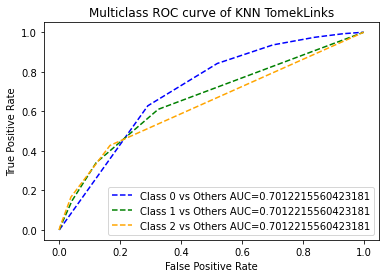

[{'Model_Name': 'KNN RUS',
  'Test_AUC': 0.707253799592914,
  'Test_Accuracy': 0.5981274230122157,
  'Test_F1score': 0.6593473849638861,
  'Test_Precision': 0.7662812382579078,
  'Test_Recall': 0.5981274230122157,
  'Train_AUC': 0.8430403003105703,
  'Train_Accuracy': 0.6484018264840182,
  'Train_F1score': 0.6459954962904091,
  'Train_Precision': 0.6505056877177817,
  'Train_Recall': 0.6484018264840182},
 {'Model_Name': 'KNN SMOTE',
  'Test_AUC': 0.6779766292950893,
  'Test_Accuracy': 0.5936654231585107,
  'Test_F1score': 0.6512915634942662,
  'Test_Precision': 0.7515916837016593,
  'Test_Recall': 0.5936654231585107,
  'Train_AUC': 0.9839756137843394,
  'Train_Accuracy': 0.8824198575751371,
  'Train_F1score': 0.879730013122798,
  'Train_Precision': 0.8910091624998492,
  'Train_Recall': 0.8824198575751371},
 {'Model_Name': 'KNN TomekLinks',
  'Test_AUC': 0.7012215560423181,
  'Test_Accuracy': 0.7982590885816693,
  'Test_F1score': 0.757949467408597,
  'Test_Precision': 0.7423660755890751

In [ ]:
#model eval of knn
knn_eval_list = model_evaluation('KNN RUS','KNN SMOTE','KNN TomekLinks',knn_rus,knn_smote,knn_smotom,x_train_rus, y_train_rus,
                                x_train_smote, y_train_smote, x_train_smotom,y_train_smotom, X_test, y_test)
knn_eval_list

In [ ]:
#adding list
add_list_to_final_df(knn_eval_list)
#Taking a look of our final comparison dataframe
comparison_df

,Model_Name,Train_Accuracy,Train_Recall,Train_Precision,Train_F1score,Train_AUC,Test_Accuracy,Test_Recall,Test_Precision,Test_F1score,Test_AUC
0,LogisticReg RUS,0.540042,0.540042,0.529332,0.516052,0.721392,0.620437,0.620437,0.771725,0.677713,0.763582
1,LogisticReg SMOTE,0.533176,0.533176,0.517040,0.505556,0.719104,0.624607,0.624607,0.772078,0.680697,0.765443
2,LogisticReg TomekLinks,0.673519,0.673519,0.825808,0.730946,0.810343,0.628484,0.628484,0.772815,0.683553,0.768755
3,Decision Tree RUS,0.998595,0.998595,0.998597,0.998595,0.999998,0.485188,0.485188,0.739720,0.566773,0.599850
4,Decision Tree SMOTE,0.998718,0.998718,0.998721,0.998719,0.999998,0.693878,0.693878,0.723701,0.707846,0.595835
5,Decision Tree TomekLinks,0.996437,0.996437,0.996436,0.996418,0.999968,0.731037,0.731037,0.731235,0.730668,0.602004
6,Random Forest RUS,0.567439,0.567439,0.562094,0.546743,0.753352,0.629947,0.629947,0.775735,0.685479,0.767090
7,Random Forest SMOTE,0.566264,0.566264,0.550768,0.545308,0.758496,0.673396,0.673396,0.774831,0.713923,0.765275
8,Random Forest TomekLinks,0.854206,0.854206,0.798617,0.795442,0.820661,0.809816,0.809816,0.758865,0.733404,0.772194
9,RandomF Tuned RUS,0.746400,0.746400,0.747875,0.745547,0.911639,0.612099,0.612099,0.779129,0.673523,0.756378


In [ ]:
#knn tuning rus
knn_rus = KNeighborsClassifier()
params = [{'n_neighbors': range(5,10),'metric': ['canberra', 'euclidean', 'minkowski']}]
knn_rus_search = GridSearchCV(knn_rus, cv = 10, param_grid = params, scoring = "f1_weighted")
knn_rus_search.fit(x_train_rus,y_train_rus)
knn_rus_tuned = knn_rus_search.best_estimator_

#knn tuning smote
knn_smote = KNeighborsClassifier()
knn_smote_search = GridSearchCV(knn_smote, cv = 10, param_grid = params, scoring = "f1_weighted")
knn_smote_search.fit(x_train_smote,y_train_smote)
knn_smote_tuned = knn_smote_search.best_estimator_

#knn tuning TomekLinks
knn_smotom = KNeighborsClassifier()
knn_smotom_search = GridSearchCV(knn_smotom, cv = 10, param_grid = params, scoring = "f1_weighted")
knn_smotom_search.fit(x_train_smotom,y_train_smotom)
knn_smotom_tuned = knn_smotom_search.best_estimator_

----- Evaluation on Random Undersampled data -----KNN Tuned RUS------
--------------- Train Data ------------

Confusion matrix 

[[1371  296  231]
 [ 459  959  480]
 [ 286  473 1139]]


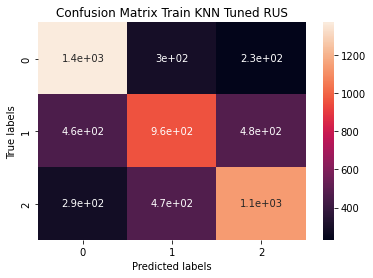

              precision    recall  f1-score   support

           0       0.65      0.72      0.68      1898
           1       0.55      0.51      0.53      1898
           2       0.62      0.60      0.61      1898

    accuracy                           0.61      5694
   macro avg       0.61      0.61      0.61      5694
weighted avg       0.61      0.61      0.61      5694

--------------Test data ---------------

Confusion matrix 

[[7132 2361 1495]
 [ 640  807  761]
 [  80  160  235]]


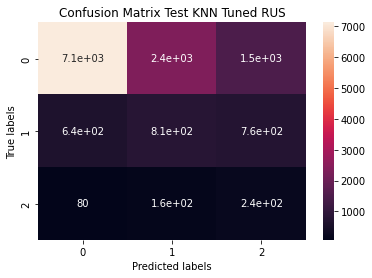

              precision    recall  f1-score   support

           0       0.91      0.65      0.76     10988
           1       0.24      0.37      0.29      2208
           2       0.09      0.49      0.16       475

    accuracy                           0.60     13671
   macro avg       0.42      0.50      0.40     13671
weighted avg       0.77      0.60      0.66     13671



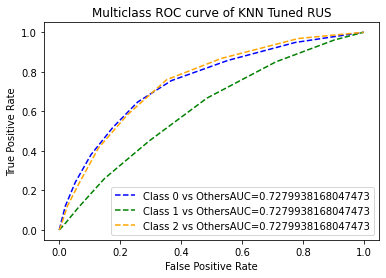

----- Evaluation on SMOTE data -------KNN Tuned SMOTE-----
--------------- Train Data ------------

Confusion matrix 

[[33590  6831  3532]
 [ 2141 40594  1218]
 [  637  1285 42031]]


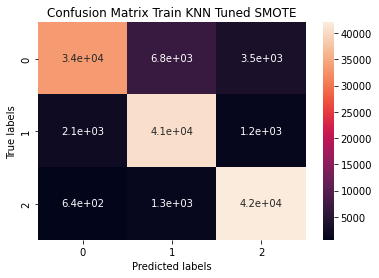

              precision    recall  f1-score   support

           0       0.92      0.76      0.84     43953
           1       0.83      0.92      0.88     43953
           2       0.90      0.96      0.93     43953

    accuracy                           0.88    131859
   macro avg       0.89      0.88      0.88    131859
weighted avg       0.89      0.88      0.88    131859

---------------Test data ---------------

Confusion matrix 

[[7535 2369 1084]
 [ 858  854  496]
 [ 149  197  129]]


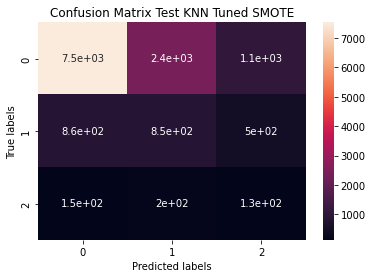

              precision    recall  f1-score   support

           0       0.88      0.69      0.77     10988
           1       0.25      0.39      0.30      2208
           2       0.08      0.27      0.12       475

    accuracy                           0.62     13671
   macro avg       0.40      0.45      0.40     13671
weighted avg       0.75      0.62      0.67     13671



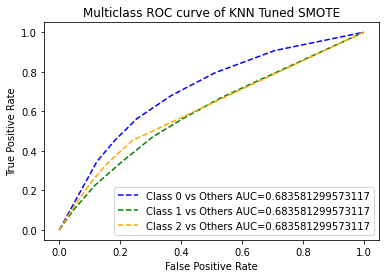

----- Evaluation on SMOTE data -------KNN Tuned TomekLink-----
--------------- Train Data ------------

Confusion matrix 

[[39543   591    73]
 [ 3609  1615   101]
 [ 1301   361   236]]


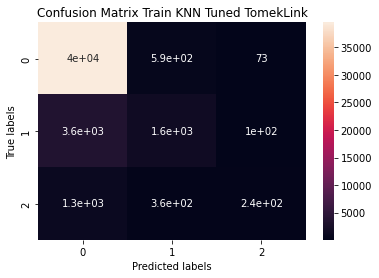

              precision    recall  f1-score   support

           0       0.89      0.98      0.93     40207
           1       0.63      0.30      0.41      5325
           2       0.58      0.12      0.20      1898

    accuracy                           0.87     47430
   macro avg       0.70      0.47      0.52     47430
weighted avg       0.85      0.87      0.85     47430

---------------Test data ---------------

Confusion matrix 

[[10587   359    42]
 [ 1795   331    82]
 [  364    91    20]]


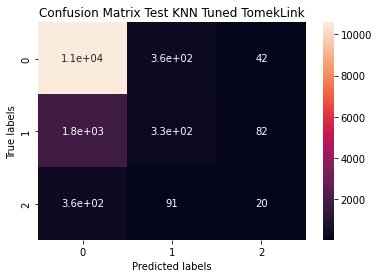

              precision    recall  f1-score   support

           0       0.83      0.96      0.89     10988
           1       0.42      0.15      0.22      2208
           2       0.14      0.04      0.06       475

    accuracy                           0.80     13671
   macro avg       0.46      0.39      0.39     13671
weighted avg       0.74      0.80      0.76     13671



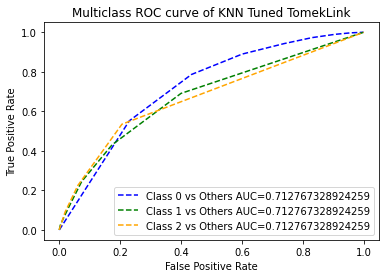

[{'Model_Name': 'KNN Tuned RUS',
  'Test_AUC': 0.7279938168047473,
  'Test_Accuracy': 0.5979079803964596,
  'Test_F1score': 0.6611188844410218,
  'Test_Precision': 0.7724866450831684,
  'Test_Recall': 0.5979079803964598,
  'Train_AUC': 0.8024614488917214,
  'Train_Accuracy': 0.609237794169301,
  'Train_F1score': 0.6066191562719456,
  'Train_Precision': 0.6061910441474871,
  'Train_Recall': 0.609237794169301},
 {'Model_Name': 'KNN Tuned SMOTE',
  'Test_AUC': 0.683581299573117,
  'Test_Accuracy': 0.623070733669812,
  'Test_F1score': 0.6733164961516873,
  'Test_Precision': 0.7519460490918976,
  'Test_Recall': 0.623070733669812,
  'Train_AUC': 0.9794562568230106,
  'Train_Accuracy': 0.8813581173829621,
  'Train_F1score': 0.87967483606816,
  'Train_Precision': 0.8851528178082166,
  'Train_Recall': 0.8813581173829621},
 {'Model_Name': 'KNN Tuned TomekLink',
  'Test_AUC': 0.712767328924259,
  'Test_Accuracy': 0.8000877770463024,
  'Test_F1score': 0.755067703953294,
  'Test_Precision': 0.74087

In [ ]:
#knn tuned model evaluation
knn_tuned_eval_list = model_evaluation('KNN Tuned RUS', 'KNN Tuned SMOTE','KNN Tuned TomekLink', knn_rus_tuned, knn_smote_tuned,knn_smotom_tuned, x_train_rus, y_train_rus,
                                       x_train_smote, y_train_smote,x_train_smotom,y_train_smotom, X_test, y_test)
knn_tuned_eval_list

In [ ]:
#adding list
add_list_to_final_df(knn_tuned_eval_list)
#Taking a look of our final comparison dataframe
comparison_df

,Model_Name,Train_Accuracy,Train_Recall,Train_Precision,Train_F1score,Train_AUC,Test_Accuracy,Test_Recall,Test_Precision,Test_F1score,Test_AUC
0,LogisticReg RUS,0.540042,0.540042,0.529332,0.516052,0.721392,0.620437,0.620437,0.771725,0.677713,0.763582
1,LogisticReg SMOTE,0.533176,0.533176,0.517040,0.505556,0.719104,0.624607,0.624607,0.772078,0.680697,0.765443
2,LogisticReg TomekLinks,0.673519,0.673519,0.825808,0.730946,0.810343,0.628484,0.628484,0.772815,0.683553,0.768755
3,Decision Tree RUS,0.998595,0.998595,0.998597,0.998595,0.999998,0.485188,0.485188,0.739720,0.566773,0.599850
4,Decision Tree SMOTE,0.998718,0.998718,0.998721,0.998719,0.999998,0.693878,0.693878,0.723701,0.707846,0.595835
5,Decision Tree TomekLinks,0.996437,0.996437,0.996436,0.996418,0.999968,0.731037,0.731037,0.731235,0.730668,0.602004
6,Random Forest RUS,0.567439,0.567439,0.562094,0.546743,0.753352,0.629947,0.629947,0.775735,0.685479,0.767090
7,Random Forest SMOTE,0.566264,0.566264,0.550768,0.545308,0.758496,0.673396,0.673396,0.774831,0.713923,0.765275
8,Random Forest TomekLinks,0.854206,0.854206,0.798617,0.795442,0.820661,0.809816,0.809816,0.758865,0.733404,0.772194
9,RandomF Tuned RUS,0.746400,0.746400,0.747875,0.745547,0.911639,0.612099,0.612099,0.779129,0.673523,0.756378


# We can see that after tuning the KNN model we can see that there is a slight improvement in Test_F1score and Test_AUC

# **XG Boost Model:**

XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. The two reasons to use XGBoost are also the two goals of the project:
* Execution Speed.
* Model Performance.

In [ ]:
#fitting rus
xgb_rus = XGBClassifier(n_estimators=100,max_depth=12,min_samples_leaf=20,min_samples_split=30)
xgb_rus.fit(x_train_rus,y_train_rus)

XGBClassifier(max_depth=12, min_samples_leaf=20, min_samples_split=30,
              objective='multi:softprob')

In [ ]:
#fitting smote
xgb_smote = XGBClassifier(n_estimators=100,max_depth=12,min_samples_leaf=20,min_samples_split=30)
xgb_smote.fit(x_train_smote,y_train_smote)

XGBClassifier(max_depth=12, min_samples_leaf=20, min_samples_split=30,
              objective='multi:softprob')

In [ ]:
#fitting TomekLink
xgb_smotom = XGBClassifier(n_estimators=100,max_depth=12,min_samples_leaf=20,min_samples_split=30)
xgb_smotom.fit(x_train_smotom,y_train_smotom)

XGBClassifier(max_depth=12, min_samples_leaf=20, min_samples_split=30,
              objective='multi:softprob')

----- Evaluation on Random Undersampled data -----XGB RUS------
--------------- Train Data ------------

Confusion matrix 

[[1865   10   23]
 [  19 1805   74]
 [   1   14 1883]]


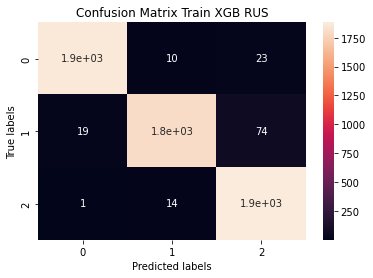

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1898
           1       0.99      0.95      0.97      1898
           2       0.95      0.99      0.97      1898

    accuracy                           0.98      5694
   macro avg       0.98      0.98      0.98      5694
weighted avg       0.98      0.98      0.98      5694

--------------Test data ---------------

Confusion matrix 

[[6744 2406 1838]
 [ 604  735  869]
 [  91  129  255]]


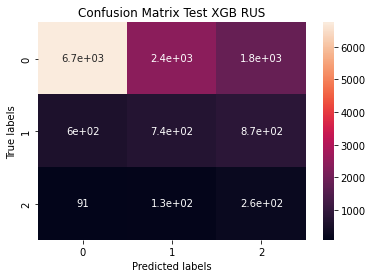

              precision    recall  f1-score   support

           0       0.91      0.61      0.73     10988
           1       0.22      0.33      0.27      2208
           2       0.09      0.54      0.15       475

    accuracy                           0.57     13671
   macro avg       0.41      0.49      0.38     13671
weighted avg       0.77      0.57      0.64     13671



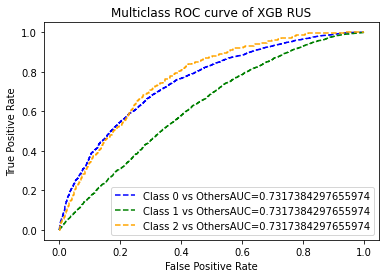

----- Evaluation on SMOTE data -------XGB SMOTE-----
--------------- Train Data ------------

Confusion matrix 

[[42729   996   228]
 [ 4295 36483  3175]
 [  724   708 42521]]


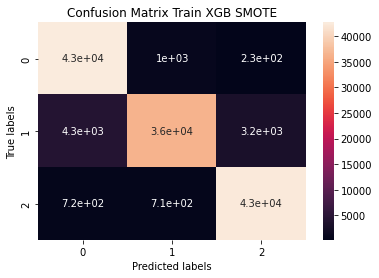

              precision    recall  f1-score   support

           0       0.89      0.97      0.93     43953
           1       0.96      0.83      0.89     43953
           2       0.93      0.97      0.95     43953

    accuracy                           0.92    131859
   macro avg       0.93      0.92      0.92    131859
weighted avg       0.93      0.92      0.92    131859

---------------Test data ---------------

Confusion matrix 

[[10234   626   128]
 [ 1563   485   160]
 [  293   139    43]]


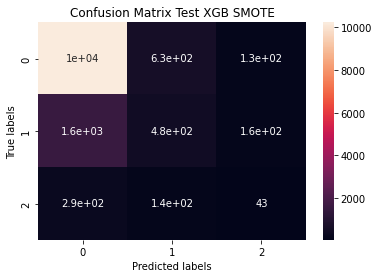

              precision    recall  f1-score   support

           0       0.85      0.93      0.89     10988
           1       0.39      0.22      0.28      2208
           2       0.13      0.09      0.11       475

    accuracy                           0.79     13671
   macro avg       0.45      0.41      0.42     13671
weighted avg       0.75      0.79      0.76     13671



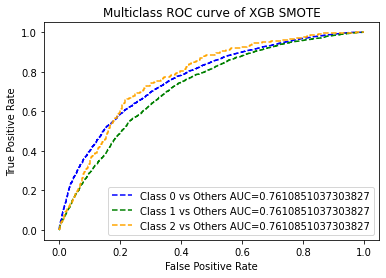

----- Evaluation on SMOTE data -------XGB TomekLink-----
--------------- Train Data ------------

Confusion matrix 

[[40072   122    13]
 [ 2225  3084    16]
 [  858   177   863]]


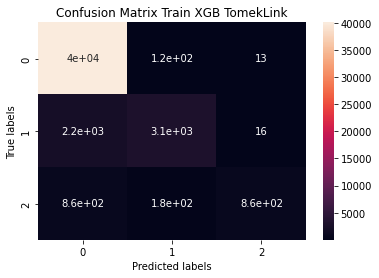

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     40207
           1       0.91      0.58      0.71      5325
           2       0.97      0.45      0.62      1898

    accuracy                           0.93     47430
   macro avg       0.94      0.68      0.76     47430
weighted avg       0.93      0.93      0.92     47430

---------------Test data ---------------

Confusion matrix 

[[10571   380    37]
 [ 1759   376    73]
 [  341   115    19]]


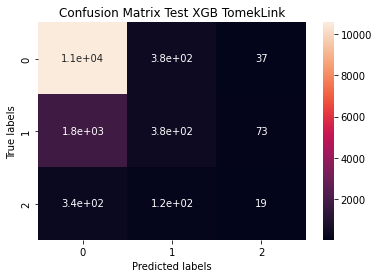

              precision    recall  f1-score   support

           0       0.83      0.96      0.89     10988
           1       0.43      0.17      0.24      2208
           2       0.15      0.04      0.06       475

    accuracy                           0.80     13671
   macro avg       0.47      0.39      0.40     13671
weighted avg       0.75      0.80      0.76     13671



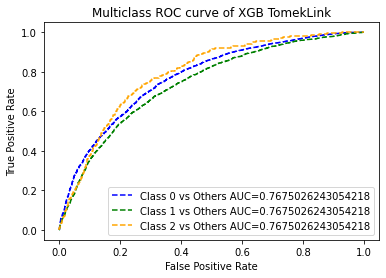

[{'Model_Name': 'XGB RUS',
  'Test_AUC': 0.7317384297655974,
  'Test_Accuracy': 0.565723063418916,
  'Test_F1score': 0.6368130262186048,
  'Test_Precision': 0.7679479028642764,
  'Test_Recall': 0.565723063418916,
  'Train_AUC': 0.9987124801475162,
  'Train_Accuracy': 0.9752370916754478,
  'Train_F1score': 0.9752388492394998,
  'Train_Precision': 0.9757593656285235,
  'Train_Recall': 0.9752370916754478},
 {'Model_Name': 'XGB SMOTE',
  'Test_AUC': 0.7610851037303827,
  'Test_Accuracy': 0.7872138102552849,
  'Test_F1score': 0.7618580475599692,
  'Test_Precision': 0.7475374743132855,
  'Test_Recall': 0.7872138102552849,
  'Train_AUC': 0.9865822443021295,
  'Train_Accuracy': 0.9232058486716872,
  'Train_F1score': 0.922145646127542,
  'Train_Precision': 0.9253874820171986,
  'Train_Recall': 0.9232058486716872},
 {'Model_Name': 'XGB TomekLink',
  'Test_AUC': 0.7675026243054218,
  'Test_Accuracy': 0.8021359081266916,
  'Test_F1score': 0.7598697682359274,
  'Test_Precision': 0.7453775127649822,

In [ ]:
#model evaluation of XGB
xgb_eval_list = model_evaluation('XGB RUS', 'XGB SMOTE','XGB TomekLink',xgb_rus, xgb_smote,xgb_smotom,x_train_rus, y_train_rus,
                                 x_train_smote, y_train_smote,x_train_smotom,y_train_smotom, X_test, y_test)
xgb_eval_list

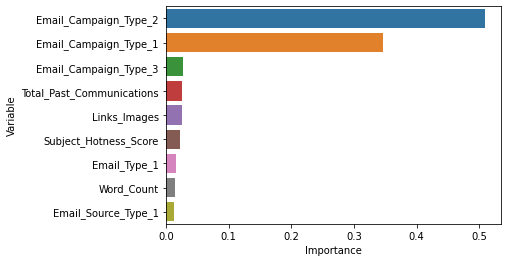

In [ ]:
#visualising feature importance of XGB
feature_imp_xgb = pd.DataFrame({"Variable": x_train_smote.columns,"Importance": xgb_smote.feature_importances_})
feature_imp_xgb.sort_values(by="Importance", ascending=False, inplace = True)
sns.barplot(x=feature_imp_xgb['Importance'], y= feature_imp_xgb['Variable'])

# Here in XGBoost model we can see that Email_Campaign_Type features is having higher feature importances compared to others

In [ ]:
#adding list
add_list_to_final_df(xgb_eval_list)
#Taking a look of our final comparison dataframe
comparison_df

,Model_Name,Train_Accuracy,Train_Recall,Train_Precision,Train_F1score,Train_AUC,Test_Accuracy,Test_Recall,Test_Precision,Test_F1score,Test_AUC
0,LogisticReg RUS,0.540042,0.540042,0.529332,0.516052,0.721392,0.620437,0.620437,0.771725,0.677713,0.763582
1,LogisticReg SMOTE,0.533176,0.533176,0.517040,0.505556,0.719104,0.624607,0.624607,0.772078,0.680697,0.765443
2,LogisticReg TomekLinks,0.673519,0.673519,0.825808,0.730946,0.810343,0.628484,0.628484,0.772815,0.683553,0.768755
3,Decision Tree RUS,0.998595,0.998595,0.998597,0.998595,0.999998,0.485188,0.485188,0.739720,0.566773,0.599850
4,Decision Tree SMOTE,0.998718,0.998718,0.998721,0.998719,0.999998,0.693878,0.693878,0.723701,0.707846,0.595835
5,Decision Tree TomekLinks,0.996437,0.996437,0.996436,0.996418,0.999968,0.731037,0.731037,0.731235,0.730668,0.602004
6,Random Forest RUS,0.567439,0.567439,0.562094,0.546743,0.753352,0.629947,0.629947,0.775735,0.685479,0.767090
7,Random Forest SMOTE,0.566264,0.566264,0.550768,0.545308,0.758496,0.673396,0.673396,0.774831,0.713923,0.765275
8,Random Forest TomekLinks,0.854206,0.854206,0.798617,0.795442,0.820661,0.809816,0.809816,0.758865,0.733404,0.772194
9,RandomF Tuned RUS,0.746400,0.746400,0.747875,0.745547,0.911639,0.612099,0.612099,0.779129,0.673523,0.756378


# **Conclusion:**

# **Evaluation Metrics:**

There is a number of model evaluation metrics to choose from but since our dataset was highly imbalanced, it is critical to understand which metric should be evaluated to understand the model performance.

* Accuracy- Accuracy simply measures how often the classifier correctly predicts. We can define accuracy as the ratio of the number of correct predictions and the total number of predictions. Accuracy is useful when the target class is well balanced but is not a good choice for the unbalanced classes, because if the model poorly predicts every observation as of the majority class, we are going to get a pretty high accuracy.

* Confusion Matrix - It is a performance measurement criteria for the machine learning classification problems where we get a table with a combination of predicted and actual values.

* Precision - Precision for a label is defined as the number of true positives divided by the number of predicted positives.

* Recall - Recall for a label is defined as the number of true positives divided by the total number of actual positives. Recall explains how many of the actual positive cases we were able to predict correctly with our model.

* F1 Score - It's actually the harmonic mean of Precision and Recall. It is maximum when Precision is equal to Recall.

* AUC ROC - The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes. When AUC is 0.5, the classifier is not able to distinguish between the classes and when it's closer to 1,the more good it becomes in distingushing them.

# **So among all the above metrics, which metric should be prioritised in comparing the performance of our various models? That's the major question here as we have a multiclass classification problem, where the problem statement just asks us to track and classify between ignored, read and acknowledged classes, we can not decide here what we want to prioritise in terms of classification, we just want to correctly classify and characterize accordingly. On top of that our data is highly imbalanced, which we tried to encounter in the ways possible.**

# **When we have a high class imbalance, we'll choose the F1 score because a high F1 score considers both precision and recall. To get a high F1, both false positives and false negatives must be low. The F1 score depends on how highly imbalanced our dataset is!**

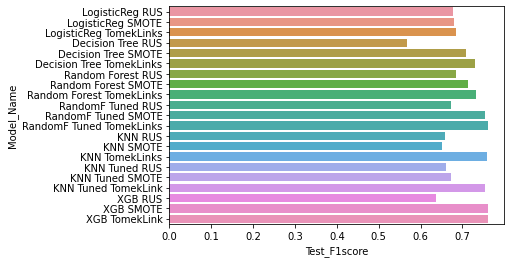

In [ ]:
#visualising our comparison df for f1 score
sns.barplot(y=comparison_df['Model_Name'], x = comparison_df['Test_F1score'])

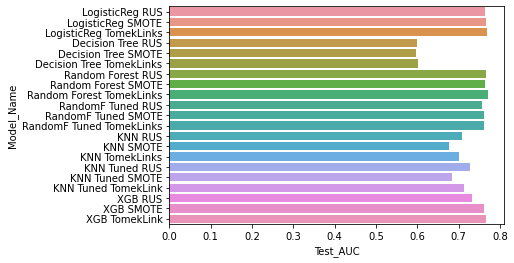

In [ ]:
#visualising for auc
sns.barplot(y=comparison_df['Model_Name'], x = comparison_df['Test_AUC'])

In [ ]:
#sorting values
comparison_df.sort_values(by=["Test_F1score",'Test_AUC'], ascending=(False,False), inplace = True, ignore_index = True)
comparison_df

,Model_Name,Train_Accuracy,Train_Recall,Train_Precision,Train_F1score,Train_AUC,Test_Accuracy,Test_Recall,Test_Precision,Test_F1score,Test_AUC
0,XGB SMOTE,0.923206,0.923206,0.925387,0.922146,0.986582,0.787214,0.787214,0.747537,0.761858,0.761085
1,RandomF Tuned TomekLinks,0.883997,0.883997,0.870405,0.857574,0.941874,0.808280,0.808280,0.751964,0.761235,0.762242
2,XGB TomekLink,0.928083,0.928083,0.928215,0.919267,0.978738,0.802136,0.802136,0.745378,0.759870,0.767503
3,KNN TomekLinks,0.882479,0.882479,0.864045,0.859569,0.930377,0.798259,0.798259,0.742366,0.757949,0.701222
4,KNN Tuned TomekLink,0.872739,0.872739,0.847747,0.846032,0.909971,0.800088,0.800088,0.740878,0.755068,0.712767
5,RandomF Tuned SMOTE,0.906203,0.906203,0.906232,0.905534,0.983304,0.751006,0.751006,0.759036,0.754879,0.761459
6,Random Forest TomekLinks,0.854206,0.854206,0.798617,0.795442,0.820661,0.809816,0.809816,0.758865,0.733404,0.772194
7,Decision Tree TomekLinks,0.996437,0.996437,0.996436,0.996418,0.999968,0.731037,0.731037,0.731235,0.730668,0.602004
8,Random Forest SMOTE,0.566264,0.566264,0.550768,0.545308,0.758496,0.673396,0.673396,0.774831,0.713923,0.765275
9,Decision Tree SMOTE,0.998718,0.998718,0.998721,0.998719,0.999998,0.693878,0.693878,0.723701,0.707846,0.595835


# We can see that **XGB SMOTE** is having highest **Test_F1score** and **Test_AUC** compare to other models